# Nalchik Investmnets Project

## **1 Project: Providing data-driven suggestions for investment based on US Stock Metrics & Performance**

### 1.1 Description and deliverables

This project is an opportunity to analyze a dataset and build predictive models that can provide insights to the Nalchik Investments (NI).

Upon completion, I will have three artifacts that I would be able to present to stakeholders of NI. One is a summary of this project, the other is a Power BI file with visualisations, and the last one is a complete code notebook provided here. I will use a regression model or machine learning model to predict price of companies using economic parameters.

In deliverables, I will include the model evaluation (and interpretation if applicable), a data visualization(s) in Jupiter and Power BI that is directly related to the question I was asked, ethical considerations, and the resources I used to troubleshoot and find answers or solutions.

## **2 PACE stages: Plan stage**

### 2.1 PACE Strategy document

**2.1.1 Understand the business scenario and problem**

The Nalchik Investments collected data from Bank of America, and I as a data analytics professional should to provide data-driven suggestions based on my understanding of the data to the stakeholders. They want to know which sectors of the economy are the best in terms of the total value of company assets and other indicators in order to choose at this stage the direction of investment inflows into the economy.

Nalchik Investments has the following question:
1. Which sectors of US market are the best for investing?
2. Which economic parameters (from this dataset) are the most important for the investing decision?

Goals in this project are to analyze the dataset and to build a model that **predicts stock prices of companies**.

About dataset

The dataset was taken from [Bank of America](https://www.kaggle.com/datasets/jeremylarcher/us-stock-metrics-and-performance).

The dataset provides a comprehensive view of various companies that are categorized under the sector, industry and originate from the USA. It includes details such as the 'Ticker', 'Company', 'Sector', 'Industry', 'Country', 'Market Cap', 'Price', 'Change (%)', 'Volume', 'Price to Earnings Ratio', 'Price to Earnings', 'Forward Price to Earnings', 'Price/Earnings to Growth', 'Price to Sales', 'Price to Book', 'Price to Cash', 'Price to Free Cash Flow', 'Earnings Per Share This Year (%)', 'Earnings Per Share Next Year (%)', 'Earnings Per Share Past 5 Years (%)', 'Earnings Per Share Next 5 Years (%)', 'Sales Past 5 Years (%)', 'Dividend (%)', 'Return on Assets (%)', 'Return on Equity (%)', 'Return on Investment (%)', 'Current Ratio', 'Quick Ratio', 'Long-Term Debt to Equity', 'Debt to Equity', 'Gross Margin (%)', 'Operating Margin (%)', 'Profit Margin', 'Earnings', 'Outstanding Shares', 'Float', 'Insider Ownership (%)', 'Insider Transactions', 'Institutional Ownership (%)', 'Float Short (%)', 'Short Ratio', 'Average Volume', 'Performance (Week) (%)', 'Performance (Month) (%)', 'Performance (Quarter) (%)', 'Performance (Half Year) (%)', 'Performance (Year) (%)', 'Performance (Year to Date) (%)', 'Volatility (Week) (%)', 'Volatility (Month) (%)', 'Analyst Recommendation', 'Relative Volume', 'Beta', 'Average True Range', 'Simple Moving Average (20) (%)', 'Simple Moving Average (50) (%)', 'Simple Moving Average (200) (%)', 'Yearly High (%)', 'Yearly Low (%)', 'Relative Strength Index', 'Change from Open (%)', 'Gap (%)', 'Volume'.

However, the dataset also includes some companies not regarded as USA companies.


**2.1.2 Familiarize yourself with the dataset**

In this dataset, there are 9,501 rows, 62 columns, and some variables:

Variable  | Description
-------------------|------------------
Ticker | Stock symbol identifying the company
Company | Name of the company
Sector | Industry category to which the company belongs
Industry | Specific sector or business category of the company
Country | Country where the company is based
Market Cap | Total market value of a company's outstanding shares
Price| Current stock price
Change (%) | Percentage change in stock price
Volume | Number of shares traded

### 2.2 Imports

Let's import packeges and load dataset

In [ ]:
 # Import packages
import re

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:.2f}'.format

# For saving models
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df0 = pd.read_csv('drive/MyDrive/Career/Data Analysis/000_Projects/002_Global_Market/data.csv')
df0.head()

,Ticker,Company,Sector,Industry,Country,Market Cap,Price,Change (%),Volume,Price to Earnings Ratio,Price to Earnings,Forward Price to Earnings,Price/Earnings to Growth,Price to Sales,Price to Book,Price to Cash,Price to Free Cash Flow,Earnings Per Share This Year (%),Earnings Per Share Next Year (%),Earnings Per Share Past 5 Years (%),Earnings Per Share Next 5 Years (%),Sales Past 5 Years (%),Dividend (%),Return on Assets (%),Return on Equity (%),Return on Investment (%),Current Ratio,Quick Ratio,Long-Term Debt to Equity,Debt to Equity,Gross Margin (%),Operating Margin (%),Profit Margin,Outstanding Shares,Float,Insider Ownership (%),Insider Transactions (%),Institutional Ownership (%),Float Short (%),Short Ratio,Average Volume,Performance (Week) (%),Performance (Month) (%),Performance (Quarter) (%),Performance (Half Year) (%),Performance (Year) (%),Performance (Year to Date) (%),Volatility (Week) (%),Volatility (Month) (%),Analyst Recommendation,Relative Volume,Beta,Average True Range,Simple Moving Average (20) (%),Simple Moving Average (50) (%),Simple Moving Average (200) (%),Yearly High (%),Yearly Low (%),Relative Strength Index,Change from Open (%),Gap (%),Volume.1
0,A,Agilent Technologies Inc.,Healthcare,Diagnostics & Research,USA,37840000000.00,129.45,1.81,367712.00,30.83,30.82,21.33,4,5.53,6.46,23.8,25.68,0.57,10.80,33.93,7.70,7.00,0.73,11.65,22.24,14.45,2.61,1.97,0.47,0.47,57.94,23.85,18.15%,292120000.00,291330000.00,0.43,-0.05,-3.26,1.97,2.69,2130000.00,0.07,19.70,14.36,8.80,-17.48,-13.82,1.86,1.95,2.21,0.89,1.12,2.74,6.04,13.36,4.89,-19.53,33.23,69.7,1.06,0.33,367712.00
1,AA,Alcoa Corp,Basic Materials,Aluminum,USA,4450000000.00,24.99,-0.40,1171185.00,-,-,34.33,-,0.41,0.99,4.18,-,-152.89,128.41,NaN,12.30,3.40,1.34,-6.08,-17.71,-13.85,1.66,0.83,0.4,0.4,1.76,-0.65,-8.09%,176970000.00,176720000.00,0.97,NaN,-5.68,6.69,2.14,5520000.00,-7.01,1.42,-11.60,-28.75,-47.27,-45.17,3.90,3.38,2.92,0.78,2.43,1,-4.23,-4.21,-25.24,-56.73,8.06,42.06,0.73,-1.08,1171185.00
2,AAA,AXS First Priority CLO Bond ETF,Financial,Exchange Traded Fund,USA,NaN,25.01,0.26,114.00,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN,-,-,-,-,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,-,4220.00,0.60,0.64,0.89,1.94,2.90,2.63,0.22,0.34,-,0.5,0.03,0.09,0.34,0.56,1.28,-0.91,3.67,58.79,0.12,0.12,114.00
3,AAAU,Goldman Sachs Physical Gold ETF,Financial,Exchange Traded Fund,USA,NaN,19.63,-1.08,862985.00,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,-,-,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,-,1530000.00,-2.27,1.19,3.51,1.08,10.57,8.46,0.74,0.75,-,1.12,0.2,0.21,-1.09,1.18,1.64,-4.57,11.43,45.7,-0.53,-0.60,862985.00
4,AACG,ATA Creativity Global ADR,Consumer Defensive,Education & Training Services,China,28860000.00,0.88,9.88,4255.00,-,-,-,-,0.92,1.97,3.13,-,NaN,NaN,NaN,25.00,1378.42,NaN,-8.84,-33.96,-35.81,0.22,0.22,0.13,0.29,50.68,-21.46,-18.84%,NaN,8840000.00,NaN,NaN,-0.70,0.05,0.8,4990.00,1.25,6.00,-22.33,-28.49,-40.89,-29.24,10.09,9.22,1,1.43,1.09,0.09,1.54,-7.80,-35.57,-63.81,12.63,48.99,6.00,4.94,4255.00


Let's check the size of the dataset

In [ ]:
df0.shape

(9501, 62)

### 2.3 Data Exploration: Initial EDA and data cleaning

**2.3.1 Gather basic information about the data**

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9501 entries, 0 to 9500
Data columns (total 62 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ticker                               9500 non-null   object 
 1   Company                              9501 non-null   object 
 2   Sector                               9501 non-null   object 
 3   Industry                             9501 non-null   object 
 4   Country                              9501 non-null   object 
 5   Market Cap                           6142 non-null   float64
 6   Price                                9501 non-null   object 
 7   Change (%)                           9485 non-null   float64
 8   Volume                               9501 non-null   float64
 9   Price to Earnings Ratio              9501 non-null   object 
 10  Price to Earnings                    9501 non-null   object 
 11  Forward Price to Earnings     

Only columns '*Ticker*', '*Company*', '*Sector*', '*Industry*' and '*Country*' shoulb be object. Every last one should be numeric: float64, so before gathering descriptive statistics I should replace '-' value by NaN, and convert other columns into numeric.

In [ ]:
df0.replace('-', np.nan, inplace=True)

In [ ]:
df0[['Price', 'Price to Earnings Ratio', 'Price to Earnings', 'Forward Price to Earnings',
     'Price/Earnings to Growth', 'Price to Sales', 'Price to Book', 'Price to Cash',
     'Price to Free Cash Flow', 'Current Ratio', 'Quick Ratio',
     'Long-Term Debt to Equity', 'Debt to Equity',
     'Short Ratio', 'Analyst Recommendation', 'Relative Volume',
     'Beta', 'Average True Range', 'Relative Strength Index']] = df0[['Price', 'Price to Earnings Ratio', 'Price to Earnings',
     'Forward Price to Earnings', 'Price/Earnings to Growth', 'Price to Sales', 'Price to Book', 'Price to Cash',
     'Price to Free Cash Flow', 'Current Ratio', 'Quick Ratio',
     'Long-Term Debt to Equity', 'Debt to Equity',
     'Short Ratio', 'Analyst Recommendation', 'Relative Volume',
     'Beta', 'Average True Range', 'Relative Strength Index']].apply(pd.to_numeric)

'*Profit Margin*' column contain '%' sign, so I should delete them from rows and make it numeric also.

In [ ]:
df0['Profit Margin'] = df0['Profit Margin'].str.replace('%', '')
df0['Profit Margin'] = pd.to_numeric(df0['Profit Margin'])
df0.rename(columns={'Profit Margin': 'Profit Margin (%)'}, inplace=True)

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9501 entries, 0 to 9500
Data columns (total 62 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ticker                               9500 non-null   object 
 1   Company                              9501 non-null   object 
 2   Sector                               9501 non-null   object 
 3   Industry                             9501 non-null   object 
 4   Country                              9501 non-null   object 
 5   Market Cap                           6142 non-null   float64
 6   Price                                9485 non-null   float64
 7   Change (%)                           9485 non-null   float64
 8   Volume                               9501 non-null   float64
 9   Price to Earnings Ratio              3122 non-null   float64
 10  Price to Earnings                    3122 non-null   float64
 11  Forward Price to Earnings     

Let's understand the economic parameters presented in the dataframe.

**Price to Earnings Ratio**

The price-to-earnings ratio (P/E) is one of the most widely used metrics for investors and analysts to determine stock valuation. It shows whether a company's stock price is overvalued or undervalued and can reveal how a stock's valuation compares to its industry group or a benchmark like the S&P 500 index. A good P/E for one group or sector could be a poor P/E for another sector so comparisons should compare similar companies.

The P/E ratio helps investors determine the market value of a stock as compared to the company's earnings. It shows what the market is willing to pay for a stock based on its past or future earnings.

\begin{equation*}
P/E.Ratio =
\frac{P}{EpS}
\end{equation*}

where P - current price

EpS - Most.recent.Earnings.per.Share



**Limitations to the P/E Ratio**

The first part of the P/E equation or price is straightforward because the current market price of a stock is easily obtained, but determining an appropriate earnings number can be more difficult. Investors must determine how to define earnings and the factors that impact earnings. There are some limitations to the P/E ratio as a result as certain factors impact the P/E of a company.

*Volatile Market Prices*

Volatile market prices can throw off the P/E ratio, but this more commonly happens in the short term.

*Earnings Makeup of a Company*

The earnings makeup of a company is often difficult to determine. The P/E is typically calculated by measuring historical earnings or trailing earnings, but historical earnings aren't of much use to investors because they reveal little about future earnings.

*Earnings Growth*

Earnings growth isn't included in the P/E ratio. The biggest limitation of the P/E ratio is that it tells investors little about the company's EPS growth prospects.

**Forward Price-to-Earnings (Forward P/E)**

Forward price-to-earnings (forward P/E) is a version of the ratio of price-to-earnings (P/E) that uses forecasted earnings for the P/E calculation. While the earnings used in this formula are just an estimate and not as reliable as current or historical earnings data, there are still benefits to estimated P/E analysis.

The forecasted earnings used in the formula below are typically either projected earnings for the following 12 months or the next full-year fiscal (FY) period. The forward P/E can be contrasted with the trailing P/E ratio.


\begin{equation*}
Forward.P/E =
\frac{P}{EEpS}
\end{equation*}

P - current share price

EEPS - estimated future earning per share


**Price/Earnings to Growth**

*PEG Ratio vs. P/E Ratio*


The price-to-earnings (P/E) ratio gives analysts a good fundamental indication of what investors are currently paying for a stock in relation to the company's earnings. One weakness of the P/E ratio, however, is that its calculation does not take into account the future expected growth of a company. The PEG ratio represents a fuller—and hopefully—more accurate valuation measure than the standard P/E ratio.

The PEG ratio builds upon the P/E ratio by factoring growth into the equation. Factoring in future growth adds an important element to stock valuation since equity investments represent a financial interest in a company's future earnings.

\begin{equation*}
PEG =
\frac{P/E}{EGR}
\end{equation*}

EGR - earning growth rate over five years

The PEG calculation can be done using a projected annual growth rate for a longer period of time than five years, but growth projections tend to become less accurate the further out they extend.

**Price-to-Book (P/B) Ratio**

Many investors use the price-to-book ratio (P/B ratio) to compare a firm's market capitalization to its book value and locate undervalued companies. This ratio is calculated by dividing the company's current stock price per share by its book value per share (BVPS).

\begin{equation*}
P/B.Ratio =
\frac{MPS}{BVpS}
\end{equation*}

MPS - Market Price per Share

BVPS - Book Value per Share = (Total assets - intangible assets - total liabilities) ÷ number of outstanding shares

The P/B ratio reflects the value that market participants attach to a company's equity relative to the book value of its equity. Many investors use the P/B ratio to find undervalued stocks. By purchasing an undervalued stock, they hope to be rewarded when the market realizes the stock is undervalued and returns its price to where it should be—according to the investor's analysis

**Current Ratio**

The current ratio is a liquidity ratio that measures a company’s ability to pay short-term obligations or those due within one year. It tells investors and analysts how a company can maximize the current assets on its balance sheet to satisfy its current debt and other payables.

\begin{equation*}
Current.Ratio =
\frac{Current.Assets}{Current.liabilities}
\end{equation*}

**Quick Ratio**

The quick ratio is an indicator of a company’s short-term liquidity position and measures a company’s ability to meet its short-term obligations with its most liquid assets.

Since it indicates the company’s ability to instantly use its near-cash assets (assets that can be converted quickly to cash) to pay down its current liabilities, it is also called the acid test ratio. An "acid test" is a slang term for a quick test designed to produce instant results.

The quick ratio measures the dollar amount of liquid assets available against the dollar amount of current liabilities of a company. Liquid assets are those current assets that can be quickly converted into cash with minimal impact on the price received in the open market, while current liabilities are a company's debts or obligations that are due to be paid to creditors within one year.


\begin{equation*}
Quick.Ratio =
\frac{Quick(liquid).Assets}{Current.liabilities}
\end{equation*}

**Debt-to-equity**

Debt-to-equity (D/E) ratio is used to evaluate a company’s financial leverage and is calculated by dividing a company’s total liabilities by its shareholder equity. D/E ratio is an important metric in corporate finance. It is a measure of the degree to which a company is financing its operations with debt rather than its own resources. Debt-to-equity ratio is a particular type of gearing ratio.

\begin{equation*}
Debt/Equity =
\frac{TL}{TSE}
\end{equation*}

TL - Total liabilities

TSE - Total Stakeholders' Equity

**2.3.2 Gather descriptive statistics about the data**

In [ ]:
df0.describe()

,Market Cap,Price,Change (%),Volume,Price to Earnings Ratio,Price to Earnings,Forward Price to Earnings,Price/Earnings to Growth,Price to Sales,Price to Book,Price to Cash,Price to Free Cash Flow,Earnings Per Share This Year (%),Earnings Per Share Next Year (%),Earnings Per Share Past 5 Years (%),Earnings Per Share Next 5 Years (%),Sales Past 5 Years (%),Dividend (%),Return on Assets (%),Return on Equity (%),Return on Investment (%),Current Ratio,Quick Ratio,Long-Term Debt to Equity,Debt to Equity,Gross Margin (%),Operating Margin (%),Profit Margin (%),Outstanding Shares,Float,Insider Ownership (%),Insider Transactions (%),Institutional Ownership (%),Float Short (%),Short Ratio,Average Volume,Performance (Week) (%),Performance (Month) (%),Performance (Quarter) (%),Performance (Half Year) (%),Performance (Year) (%),Performance (Year to Date) (%),Volatility (Week) (%),Volatility (Month) (%),Analyst Recommendation,Relative Volume,Beta,Average True Range,Simple Moving Average (20) (%),Simple Moving Average (50) (%),Simple Moving Average (200) (%),Yearly High (%),Yearly Low (%),Relative Strength Index,Change from Open (%),Gap (%),Volume.1
count,6142.00,9485.00,9485.00,9501.00,3122.00,3122.00,2986.00,1765.00,5145.00,5503.00,5089.00,2792.00,4383.00,4298.00,3632.00,2828.00,5566.00,5139.00,5463.00,5276.00,5394.00,5172.00,4681.00,5243.00,5243.00,4274.00,5567.00,4833.00,6073.00,6070.00,5681.00,3084.00,5047.00,6051.00,6213.00,9485.00,9470.00,9413.00,9203.00,8999.00,8659.00,9485.00,9470.00,9413.00,4908.00,9485.00,8719.00,9485.00,9485.00,9485.00,9485.00,9485.00,9485.00,9387.00,9485.00,9485.00,9501.00
mean,10058898114.62,98.34,-0.51,494532.00,82.71,82.74,27.63,12.13,42.20,23.24,208.16,54.41,54.15,62.32,2.64,12.03,417.31,3.92,-13.80,-70.55,-76.43,3.43,3.20,1.48,1.73,-98.33,-6030.70,-7045.42,185370498.93,165578785.83,22.21,0.00,1.58,3.94,3.88,1081139.60,-0.57,7.66,-1.25,-3.21,0.79,2.71,3.63,3.70,1.85,2.04,0.99,1.64,1.86,3.45,-2.98,-23.82,38.68,58.12,-0.29,-0.12,494532.00
std,73619447923.54,5621.24,3.71,4837965.84,1088.86,1090.05,106.50,143.32,1281.70,824.23,3402.77,597.93,1367.58,568.37,66.21,12.16,21892.51,5.32,56.98,860.84,2152.72,6.94,5.69,19.10,19.31,3009.07,204865.68,207469.67,704263720.99,696175358.98,24.51,0.29,30.89,6.19,4.98,4309284.58,8.60,21.26,27.05,37.37,76.72,53.17,6.06,4.79,0.79,45.11,1.45,78.16,10.49,15.89,25.77,26.85,83.42,12.94,3.48,2.85,4837965.84
min,290000.00,0.01,-52.20,0.00,0.00,0.00,0.22,0.03,0.01,0.01,0.03,0.05,-9931.99,-9623.25,-1379.95,-15.00,-3546.42,0.00,-1939.09,-42790.17,-152683.33,0.00,0.00,0.00,0.00,-168734.95,-12328770.77,-11348063.96,190000.00,110000.00,0.00,-1.00,-98.58,0.00,0.00,0.00,-93.50,-94.26,-98.04,-99.02,-99.95,-99.92,0.00,0.00,1.00,0.00,-7.04,0.00,-93.25,-94.67,-99.55,-99.98,-50.23,2.89,-45.27,-58.80,0.00
25%,89420000.00,7.73,-0.92,3220.00,9.82,9.78,9.57,1.01,0.73,0.88,2.31,7.38,-20.75,2.05,-8.79,5.00,0.31,1.35,-17.30,-34.26,-24.89,0.87,0.79,0.03,0.08,18.31,-10.36,-24.78,17600000.00,11425000.00,2.10,-0.02,-3.28,0.49,0.93,20410.00,-1.97,1.12,-7.99,-13.46,-19.51,-15.28,0.70,0.75,1.00,0.50,0.56,0.16,-0.16,-0.06,-8.61,-35.90,10.45,49.14,-0.65,-0.40,3220.00
50%,472130000.00,21.75,-0.04,30021.00,18.20,18.27,14.20,1.98,1.83,1.56,7.03,13.90,7.37,14.04,8.58,10.00,9.41,2.79,0.62,1.92,1.42,1.68,1.40,0.31,0.45,33.72,3.23,2.47,45290000.00,35960000.00,12.45,-0.00,-0.44,1.92,2.67,122860.00,0.21,6.12,1.24,0.56,-0.10,1.77,1.99,2.10,1.75,0.81,0.96,0.32,1.76,4.08,1.43,-12.69,19.73,59.99,0.12,-0.02,30021.00
75%,2960000000.00,41.24,0.39,173580.00,35.32,35.38,22.86,3.73,4.90,3.28,22.93,27.26,44.14,43.34,24.17,17.50,25.50,4.80,4.49,12.48,8.12,3.47,3.09,0.93,1.15,56.07,16.20,11.71,122960000.00,102305000.00,36.19,0.00,2.03,4.83,5.18,667140.00,1.35,11.87,5.54,7.64,13.25,14.74,4.41,4.66,2.36,1.20,1.32,0.79,4.37,8.40,7.06,-3.42,41.35,68.25,0.69,0.23,173580.00
max,2982570000000.00,547380.00,110.65,394914050.00,45400.00,45500.00,3300.93,4205.08,89101.04,51660.00,228645.80,22067.36,79641.23,19959.49,308.35,75.43,1629025.70,210.15

Almost every column contains outliers, therefore, when modeling, you should pay close attention to them, and most likely exclude them from the dataframe.

**2.3.3 Check missing values**

In [ ]:
df0.isna().sum()

Ticker                       1
Company                      0
Sector                       0
Industry                     0
Country                      0
                          ... 
Yearly Low (%)              16
Relative Strength Index    114
Change from Open (%)        16
Gap (%)                     16
Volume.1                     0
Length: 62, dtype: int64

There are a lot of columns (because of this, not all are displayed) and missing data in the dataframe, it is necessary to clear the date frame from them, and, if possible, fill in the missing data with values that will minimally affect the created predictive model.

**2.3.5. Check duplicates**

In [ ]:
dup_df = df0[df0['Company'].duplicated()]
df0[df0['Company'].isin(dup_df['Company'])].sort_values('Company')

,Ticker,Company,Sector,Industry,Country,Market Cap,Price,Change (%),Volume,Price to Earnings Ratio,Price to Earnings,Forward Price to Earnings,Price/Earnings to Growth,Price to Sales,Price to Book,Price to Cash,Price to Free Cash Flow,Earnings Per Share This Year (%),Earnings Per Share Next Year (%),Earnings Per Share Past 5 Years (%),Earnings Per Share Next 5 Years (%),Sales Past 5 Years (%),Dividend (%),Return on Assets (%),Return on Equity (%),Return on Investment (%),Current Ratio,Quick Ratio,Long-Term Debt to Equity,Debt to Equity,Gross Margin (%),Operating Margin (%),Profit Margin (%),Outstanding Shares,Float,Insider Ownership (%),Insider Transactions (%),Institutional Ownership (%),Float Short (%),Short Ratio,Average Volume,Performance (Week) (%),Performance (Month) (%),Performance (Quarter) (%),Performance (Half Year) (%),Performance (Year) (%),Performance (Year to Date) (%),Volatility (Week) (%),Volatility (Month) (%),Analyst Recommendation,Relative Volume,Beta,Average True Range,Simple Moving Average (20) (%),Simple Moving Average (50) (%),Simple Moving Average (200) (%),Yearly High (%),Yearly Low (%),Relative Strength Index,Change from Open (%),Gap (%),Volume.1
486,AQN,Algonquin Power & Utilities Corp,Utilities,Utilities - Renewable,Canada,4290000000.00,6.03,-0.66,1224943.00,NaN,NaN,11.16,NaN,1.56,0.91,45.50,NaN,-24.31,3.81,NaN,0.30,12.83,7.40,-1.30,-4.52,-1.89,0.66,0.50,1.59,1.71,21.08,17.80,-8.72,712140000.00,688480000.00,3.32,NaN,NaN,4.73,6.74,4840000.00,-4.40,8.77,-15.20,-29.30,-16.14,-6.75,2.42,2.81,2.91,0.64,0.71,0.17,1.17,6.75,-18.03,-33.48,24.08,55.43,1.00,-0.82,1224943.00
487,AQNU,Algonquin Power & Utilities Corp,Utilities,Utilities - Renewable,Canada,14970000000.00,21.02,-0.83,10096.00,NaN,NaN,NaN,NaN,5.47,3.18,158.93,NaN,NaN,NaN,NaN,NaN,12.83,18.34,-1.30,-4.52,-1.89,0.66,0.50,1.59,1.71,21.08,17.80,-8.72,23000000.00,23000000.00,96.77,NaN,NaN,0.07,0.23,68620.00,-4.26,4.44,-15.90,-29.45,-16.57,-11.40,1.87,2.54,NaN,0.26,0.81,0.54,-2.02,1.99,-20.01,-34.01,16.53,46.40,-0.42,0.19,10096.00
3722,GOOG,Alphabet Inc,Communication Services,Internet Content & Information,USA,1675950000000.00,133.69,-2.24,11074374.00,25.65,25.71,20.05,1.32,5.66,6.15,13.99,21.61,25.91,16.46,38.33,19.48,20.89,NaN,17.68,25.33,22.28,2.04,2.01,0.10,0.11,55.93,27.02,22.52,6000000000.00,5330000000.00,57.44,-0.00,NaN,0.65,1.60,21420000.00,3.12,2.29,-1.01,8.32,43.37,51.81,2.09,1.80,1.45,1.14,1.06,3.23,-0.95,-0.14,9.88,-5.39,57.41,49.57,0.70,-2.11,11074374.00
3723,GOOGL,Alphabet Inc,Communication Services,Internet Content & Information,USA,1657740000000.00,132.23,-2.13,12744727.00,25.37,25.42,19.82,1.31,5.59,6.08,13.84,21.37,25.96,16.48,38.33,19.48,20.89,NaN,17.68,25.33,22.28,2.04,2.01,0.10,0.11,55.93,27.02,22.52,5960000000.00,5890000000.00,52.90,-0.00,-0.21,0.78,1.63,28120000.00,3.11,2.34,-1.51,7.80,42.24,51.07,2.14,1.86,1.44,1.10,1.05,3.25,-0.85,-0.20,9.44,-5.62,57.07,49.64,0.72,-1.96,12744727.00
787,BATRA,Atlanta Braves Holdings Inc,Communication Services,Entertainment,USA,2570000000.00,41.56,-0.48,5545.00,NaN,NaN,NaN,NaN,NaN,4.63,20.65,NaN,NaN,NaN,NaN,45.10,4.41,NaN,NaN,NaN,NaN,1.29,1.29,1.16,1.17,NaN,NaN,NaN,10320000.00,10210000.00,83.45,NaN,0.20,4.16,9.82,43290.00,4.51,13.28,4.59,4.72,26.74,28.99,1.87,1.75,1.67,0.71,0.97,0.83,5.64,6.91,7.07,-23.30,33.65,67.45,0.62,0.38,5545.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8572,UAA,Under Armour Inc,Consumer Cyclical,Apparel Manufacturing,USA,3820000000.00,8.70,2.54,2239124.00,9.68,9.53,14.23,1.12,0.64,1.80,5.59,NaN,-15.02,22.42,NaN,8.55,4.17,NaN,8.62,21.01,12.28,2.24,1.35,0.60,0.70,45.10,4.54,7.03,188700000.00,188390000.00,57.00,NaN,-1.80,8.90,2.60,6450000.00,-0.47,18.52,17.54,11.68,-11.35,-16.24,2.94,3.50,2.10,1.06,1.67,0.29,7.23,15.78,8.31,-34.76,35.29,65.27,0.71,-0.12,2239124.00
8671,UO

There are no such a big number of duplicates, because some companies change their Ticket. But it's not obvious which rows are more correct (which ticket is correct now), because some company data are almost the same, like Google or Real Estate, some completely different, so let's keep only firt rows.

In [ ]:
df1 = df0.drop_duplicates(keep='first', subset=['Company'])

### 2.4 Data cleaning, feature enginering and transformation

#### 2.4.1 Create functions for Data cleaning, feature enginering and transformation

Some columns can be absolutely same, come can have too big correlation and this can have negative consequences for the future model, so I will write function, which can help to identify the correlation between columns

In [ ]:
def create_correlation_matrix(data, fig_size=(10,5), masked=True):
  # Create a heatmap to visualize how correlated variables are
  corr = data.corr(numeric_only=True)

  # Set up the matplotlib plot configuration
  f, ax = plt.subplots(figsize=fig_size)

  # Generate a mask for upper traingle
  mask = np.triu(np.ones_like(corr, dtype=bool))

  # Configure a custom diverging colormap
  cmap = sns.diverging_palette(230, 20, as_cmap=True)

  # Draw the heatmap
  if masked:
    sns.heatmap(corr, annot=True, mask=mask, cmap=cmap)
  else:
    sns.heatmap(corr, annot=True, cmap=cmap)

  # displaying the plotted heatmap
  plt.show()

In [ ]:
def find_outliers(data, column, iqr=True, q1=0.25, q3=0.75, threshold=1.5):
  if iqr:
    # Compute the q1 percentile value in column
    percentile_q1 = data[column].quantile(0.25)
    # Compute the q3 percentile value in column
    percentile_q3 = data[column].quantile(0.75)
    # Compute the interquartile range in column
    iqr = percentile_q3 - percentile_q1

    # Define the upper limit and lower limit for non-outlier values in column
    upper_limit = round(percentile_q3 + threshold * iqr, 2)
    lower_limit = round(percentile_q1 - threshold * iqr, 2)

    # Identify subset of data containing outliers in `Price`
    outliers = data[(data[column] > upper_limit) | (data[column] < lower_limit)]

  else:
    upper_limit = data[column].mean() + threshold * data[column].std()  # Right from the mean
    lower_limit = data[column].mean() - threshold * data[column].std()  # Left from the mean
    outliers = data[(data[column] > upper_limit) | (data[column] < lower_limit)]

  # Count how many rows in the data contain outliers in `User_Rating`
  print(f"Number of rows in the data containing outliers in `{column}`:", len(outliers))

  return lower_limit, upper_limit, outliers


def visualize_outliers(data, column):
  plt.figure(figsize=(4,2))
  plt.title(f'Boxplot to detect outliers for {column}', fontsize=12)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  sns.boxplot(x=data[column])
  plt.show()


def visualize_distribution(data, outliers_df, column, bins):
  vis_df = data[~data[column].isin(outliers_df[column])]
  plt.hist(vis_df[column], bins=bins, alpha=0.6, color='b')
  plt.show()

#### 2.4.2 Containing same columns

After descriptive statistics it looks like that Volume and Volume2 are absolutely the same columns. Let's check it out.

In [ ]:
df1[['Volume', 'Volume.1']].describe()

,Volume,Volume.1
count,9465.00,9465.00
mean,494069.71,494069.71
std,4845395.82,4845395.82
min,0.00,0.00
25%,3210.00,3210.00
50%,30013.00,30013.00
75%,173271.00,173271.00
max,394914050.00,394914050.00


In [ ]:
df1[['Volume', 'Volume.1']].head(20)

,Volume,Volume.1
0,367712.00,367712.00
1,1171185.00,1171185.00
2,114.00,114.00
3,862985.00,862985.00
4,4255.00,4255.00
5,11.00,11.00
6,2221.00,2221.00
7,22395.00,22395.00
8,85.00,85.00
9,651976.00,651976.00


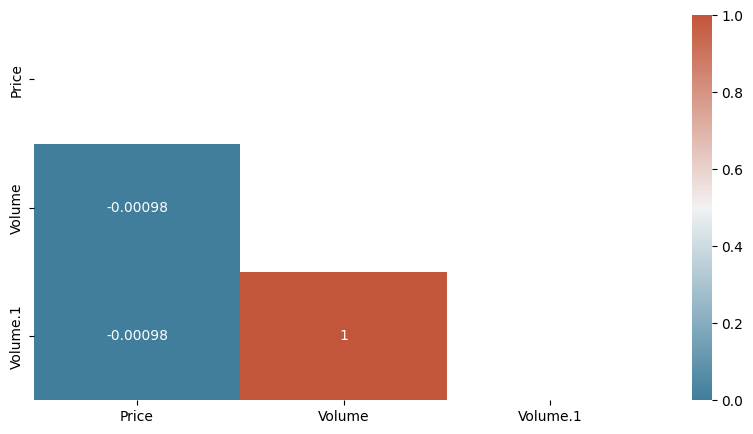

In [ ]:
create_correlation_matrix(df1[['Price', 'Volume', 'Volume.1']])

Yes, they are the same, so I'll drop '*Volume2*' column. Moreover I can drop '*Earnings Per Share Next Year*', '*Earnings Per Share Next 5 Years*', '*Analyst Recommendation*', '*Forward Price to Earnings*' because We don't have any specific formula how this data were calculated and everything are about future - predictions - not collected data.

In [ ]:
df1 = df1.drop(columns=['Ticker', 'Earnings Per Share Next Year (%)', 'Earnings Per Share Next 5 Years (%)', 'Analyst Recommendation', 'Forward Price to Earnings', 'Volume.1'])

#### 2.4.3 Dealing with missing values

In [ ]:
df1.isna().sum()

Company                                   0
Sector                                    0
Industry                                  0
Country                                   0
Market Cap                             3357
Price                                    16
Change (%)                               16
Volume                                    0
Price to Earnings Ratio                6370
Price to Earnings                      6370
Price/Earnings to Growth               7711
Price to Sales                         4351
Price to Book                          3993
Price to Cash                          4407
Price to Free Cash Flow                6698
Earnings Per Share This Year (%)       5107
Earnings Per Share Past 5 Years (%)    5851
Sales Past 5 Years (%)                 3930
Dividend (%)                           4344
Return on Assets (%)                   4032
Return on Equity (%)                   4218
Return on Investment (%)               4102
Current Ratio                   

##### 'Market Cap', 'Price' and 'Change (%)' columns

There are so many missing values, but the most important columns are '*Market Cap*', '*Price*' and '*Change (%)*', and my aim is Change and Price, so i will exclude rows where this data are missing.

In [ ]:
df1[df1['Price'].isna()]

,Company,Sector,Industry,Country,Market Cap,Price,Change (%),Volume,Price to Earnings Ratio,Price to Earnings,Price/Earnings to Growth,Price to Sales,Price to Book,Price to Cash,Price to Free Cash Flow,Earnings Per Share This Year (%),Earnings Per Share Past 5 Years (%),Sales Past 5 Years (%),Dividend (%),Return on Assets (%),Return on Equity (%),Return on Investment (%),Current Ratio,Quick Ratio,Long-Term Debt to Equity,Debt to Equity,Gross Margin (%),Operating Margin (%),Profit Margin (%),Outstanding Shares,Float,Insider Ownership (%),Insider Transactions (%),Institutional Ownership (%),Float Short (%),Short Ratio,Average Volume,Performance (Week) (%),Performance (Month) (%),Performance (Quarter) (%),Performance (Half Year) (%),Performance (Year) (%),Performance (Year to Date) (%),Volatility (Week) (%),Volatility (Month) (%),Relative Volume,Beta,Average True Range,Simple Moving Average (20) (%),Simple Moving Average (50) (%),Simple Moving Average (200) (%),Yearly High (%),Yearly Low (%),Relative Strength Index,Change from Open (%),Gap (%)
1468,CardieX Limited,Healthcare,Medical Devices,Australia,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1552,GRD Biotechnology Acquisition Limited,Financial,Shell Companies,China,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1643,Chi Ko Holdings Ltd,Industrials,Engineering & Construction,Hong Kong,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.32,41.17,30.91,0.91,0.91,0.35,0.67,7.76,NaN,3.66,12990000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2613,Elephant Oil,Energy,Oil & Gas E&P,USA,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2857,"EV Mobility, Inc.",Industrials,Rental & Leasing Services,USA,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4840,"Jupiter Wellness, Inc.",Healthcare,Drug Manufacturers - Specialty & Generic,USA,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32450000.00,9020000.00,44.96,NaN,NaN,27.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5105,Lafayette Energy Corp,Energy,Oil & Gas E&P,USA,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5132,Lucas GC Ltd,Industrials,Staffing & Employment Services,China,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81130000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6239,Corporate Office Properties Trust,Real Estate,REIT - Office,USA,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.70,11.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112530000.00,111690000.00,0.35,NaN,NaN,2.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6321,Opti-Harvest Inc,Consumer Defensive,Farm Products,USA,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-917.89,NaN,NaN,0.01,0.01,NaN,NaN,-993.20,NaN,-16388.35,16440000.00,8410000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2 = df1.dropna(subset=['Price'])

In [ ]:
df1.isna().sum()

Company                                   0
Sector                                    0
Industry                                  0
Country                                   0
Market Cap                             3357
Price                                    16
Change (%)                               16
Volume                                    0
Price to Earnings Ratio                6370
Price to Earnings                      6370
Price/Earnings to Growth               7711
Price to Sales                         4351
Price to Book                          3993
Price to Cash                          4407
Price to Free Cash Flow                6698
Earnings Per Share This Year (%)       5107
Earnings Per Share Past 5 Years (%)    5851
Sales Past 5 Years (%)                 3930
Dividend (%)                           4344
Return on Assets (%)                   4032
Return on Equity (%)                   4218
Return on Investment (%)               4102
Current Ratio                   

It' obvious that companies without 'Market Cap' data have many missing values, so that are useless rows too

In [ ]:
df2[df2['Market Cap'].isna()].isna().sum()

Company                                   0
Sector                                    0
Industry                                  0
Country                                   0
Market Cap                             3341
Price                                     0
Change (%)                                0
Volume                                    0
Price to Earnings Ratio                3338
Price to Earnings                      3338
Price/Earnings to Growth               3341
Price to Sales                         3341
Price to Book                          3338
Price to Cash                          3341
Price to Free Cash Flow                3341
Earnings Per Share This Year (%)       3340
Earnings Per Share Past 5 Years (%)    3340
Sales Past 5 Years (%)                 3339
Dividend (%)                            666
Return on Assets (%)                   3338
Return on Equity (%)                   3341
Return on Investment (%)               3339
Current Ratio                   

In [ ]:
df3 = df2[df2['Market Cap'].notna()]
df3.shape

(6108, 56)

##### 'Price' columns

There are so many missing values in 'Price to' columns, so I need to analyze rows, where missing rows are more than 3 thousand.

In [ ]:
price_df = df3[['Company', 'Sector', 'Industry', 'Country', 'Market Cap', 'Price', 'Price to Earnings Ratio', 'Price to Earnings', 'Price/Earnings to Growth', 'Price to Sales', 'Price to Book', 'Price to Cash', 'Price to Free Cash Flow']]
price_df.isna().sum()

Company                        0
Sector                         0
Industry                       0
Country                        0
Market Cap                     0
Price                          0
Price to Earnings Ratio     3016
Price to Earnings           3016
Price/Earnings to Growth    4354
Price to Sales               994
Price to Book                639
Price to Cash               1050
Price to Free Cash Flow     3341
dtype: int64

In [ ]:
price_df.describe()

,Market Cap,Price,Price to Earnings Ratio,Price to Earnings,Price/Earnings to Growth,Price to Sales,Price to Book,Price to Cash,Price to Free Cash Flow
count,6108.00,6108.00,3092.00,3092.00,1754.00,5114.00,5469.00,5058.00,2767.00
mean,9672996581.53,129.64,83.30,83.33,12.15,42.45,21.48,209.31,54.74
std,70068553894.63,7004.83,1094.11,1095.30,143.76,1285.57,814.89,3413.15,600.61
min,290000.00,0.01,0.05,0.05,0.03,0.01,0.01,0.03,0.05
25%,88200000.00,3.36,9.85,9.82,1.01,0.74,0.87,2.30,7.41
50%,463990000.00,10.96,18.29,18.38,1.98,1.83,1.56,7.03,13.97
75%,2940000000.00,33.14,35.42,35.44,3.73,4.90,3.29,22.98,27.34
max,2982570000000.00,547380.00,45400.00,45500.00,4205.08,89101.04,51660.00,228645.80,22067.36


In [ ]:
lower_limit, upper_limit, price_outliers = find_outliers(price_df, 'Price')

Number of rows in the data containing outliers in `Price`: 726


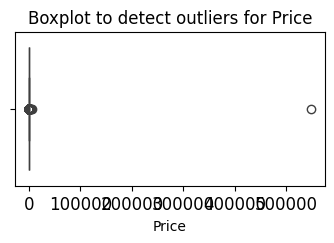

In [ ]:
visualize_outliers(price_df, 'Price')

In [ ]:
price_df[price_df['Price']==price_df['Price'].max()]

,Company,Sector,Industry,Country,Market Cap,Price,Price to Earnings Ratio,Price to Earnings,Price/Earnings to Growth,Price to Sales,Price to Book,Price to Cash,Price to Free Cash Flow
1164,Berkshire Hathaway Inc.,Financial,Insurance - Diversified,USA,790200000000.00,547380.00,10.41,10.39,NaN,1.99,1.51,NaN,29.52


Berkshire Hathaway Inc have the biggest stock price, and this value can have big influence on the future model, so let's esclude it from dataset.

In [ ]:
price_df.drop(price_df['Price'].idxmax(), inplace=True)

<ipython-input-31-b1d325b1837d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df.drop(price_df['Price'].idxmax(), inplace=True)


In [ ]:
lower_limit, upper_limit, price_outliers = find_outliers(price_df, 'Price')

Number of rows in the data containing outliers in `Price`: 725


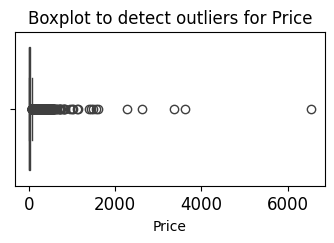

In [ ]:
visualize_outliers(price_df, 'Price')

In [ ]:
price_df.Price.describe()

count   6107.00
mean      40.03
std      142.74
min        0.01
25%        3.36
50%       10.96
75%       33.13
max     6533.56
Name: Price, dtype: float64

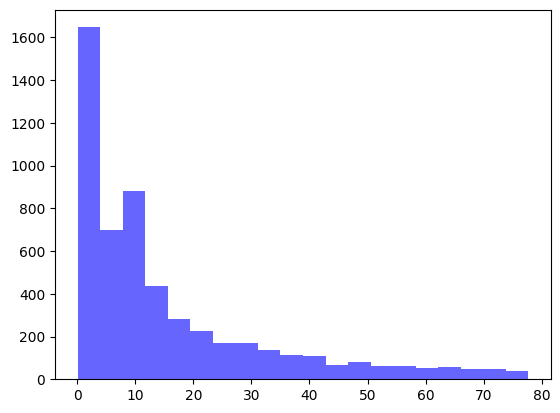

In [ ]:
visualize_distribution(price_df, price_outliers, 'Price', 20)

**Price to Earnings Ratio**

The formula for **Price to Earnings Ratio** is:
\begin{equation*}
P/E.Ratio =
\frac{Price}{Earnings.per.Share}
\end{equation*}

Dataset have both values, so I can exclude '*Price to Earnings Ratio*' column

**Price/Earnings to Growth**

The **Price/Earnings to Growth** ratio (PEG ratio) is a stock's Price-to-Earnings (P/E) ratio divided by the growth rate of its earnings for a specified time period.

Number of rows in the data containing outliers in `Price/Earnings to Growth`: 189


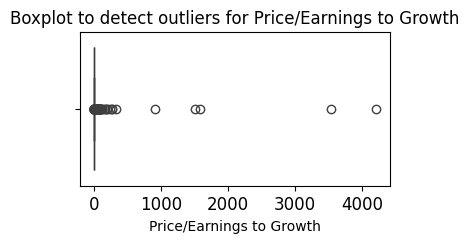

In [ ]:
lower_limit, upper_limit, price_earnings_growth_outliers = find_outliers(price_df, 'Price/Earnings to Growth')
visualize_outliers(price_df, 'Price/Earnings to Growth')

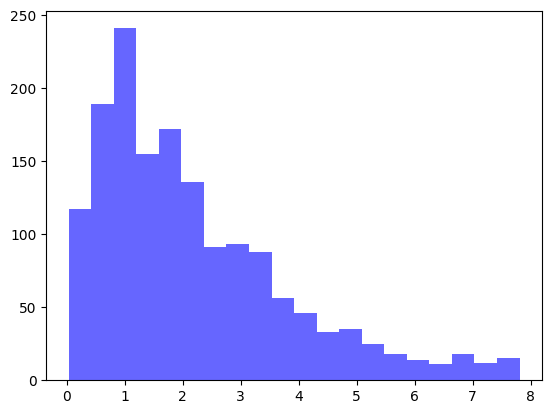

In [ ]:
visualize_distribution(price_df, price_earnings_growth_outliers, 'Price/Earnings to Growth', 20)

In [ ]:
price_earnings_growth_outliers[['Company', 'Sector', 'Market Cap', 'Price/Earnings to Growth']].sort_values(by=['Price/Earnings to Growth'], ascending=False).head()

,Company,Sector,Market Cap,Price/Earnings to Growth
31,Abcam ADR,Healthcare,4940000000.00,4205.08
215,"Agilysys, Inc",Technology,2120000000.00,3536.59
8152,Takeda Pharmaceutical Co ADR,Healthcare,43990000000.00,1583.26
4598,Iteris Inc.,Technology,194400000.00,1513.33
6765,Perrigo Company plc,Healthcare,3980000000.00,915.47


**Price to Sales**

Number of rows in the data containing outliers in `Price to Sales`: 676


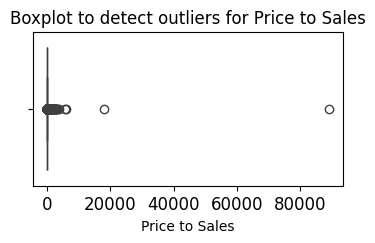

In [ ]:
lower_limit, upper_limit, price_to_sales_outliers = find_outliers(price_df, 'Price to Sales')
visualize_outliers(price_df, 'Price to Sales')

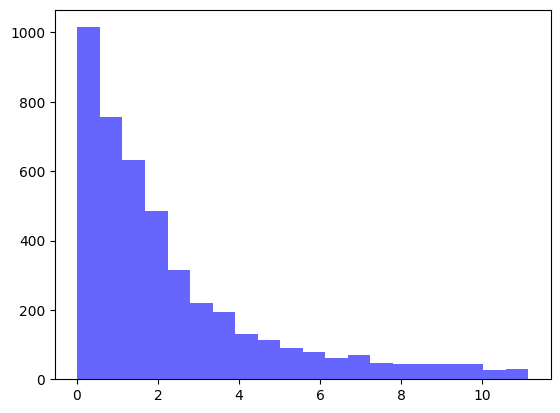

In [ ]:
visualize_distribution(price_df, price_to_sales_outliers, 'Price to Sales', 20)

In [ ]:
print('Price to Sales\nmax =', price_df['Price to Sales'].max(), '\nmin =', price_df['Price to Sales'].min())
price_df['Price to Sales'].value_counts()

Price to Sales
max = 89101.04 
min = 0.01


0.44      30
0.28      30
0.25      29
0.22      27
0.19      26
          ..
11.45      1
5.29       1
568.51     1
12.25      1
10.37      1
Name: Price to Sales, Length: 1468, dtype: int64

I will fill with min this column, now I can't do it, because of almost 1000 missing values, and the influence on the model may be too great, despite the fact that this is a logical filling (no data - no sales).

**Price to Book**

**Book value** is the sum of the amounts of all the line items in the shareholders' equity section on a company's balance sheet.

Number of rows in the data containing outliers in `Price to Book`: 603


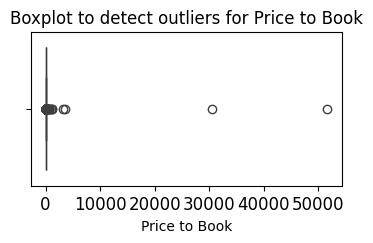

In [ ]:
lower_limit, upper_limit, price_to_book_outliers = find_outliers(price_df, 'Price to Book')
visualize_outliers(price_df, 'Price to Book')

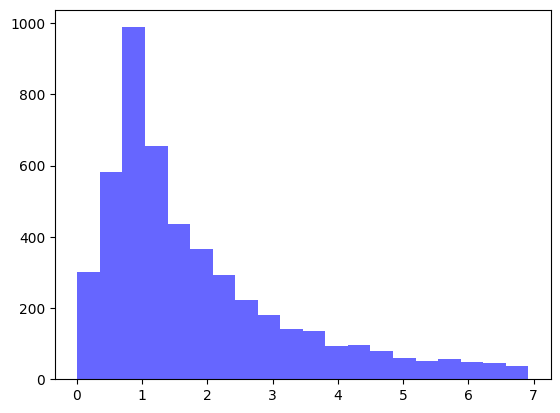

In [ ]:
visualize_distribution(price_df, price_to_book_outliers, 'Price to Book', 20)

It's important column, but there are 639 rows with missing values, so now it's not obvious what to do with this data, let's continue analyzing.

**Price to Cash**

Number of rows in the data containing outliers in `Price to Cash`: 769


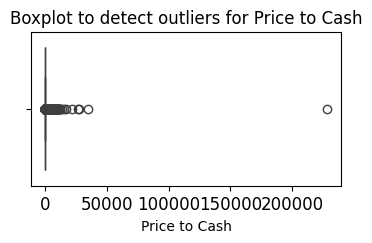

In [ ]:
lower_limit, upper_limit, price_to_cash_outliers = find_outliers(price_df, 'Price to Cash')
visualize_outliers(price_df, 'Price to Cash')

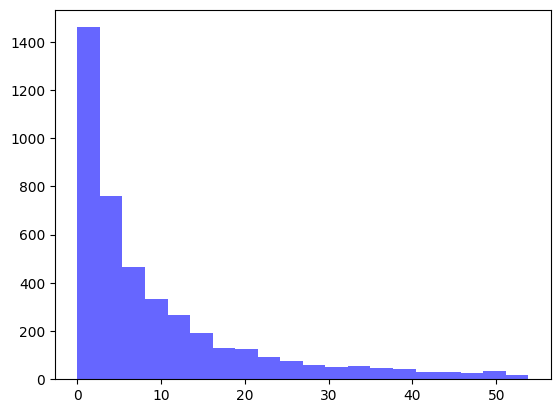

In [ ]:
visualize_distribution(price_df, price_to_cash_outliers, 'Price to Cash', 20)

In [ ]:
price_to_cash_outliers[['Company', 'Sector', 'Market Cap', 'Price to Cash']].sort_values(by=['Price to Cash'], ascending=False).head()

,Company,Sector,Market Cap,Price to Cash
8700,USA Compression Partners LP,Energy,2330000000.00,228645.80
3603,Gores Holdings IX Inc,Financial,689670000.00,34483.31
8462,TortoiseEcofin Acquisition Corp III,Financial,275470000.00,27546.96
4957,Kinetik Holdings Inc,Energy,1860000000.00,26621.34
2581,"Eastgroup Properties, Inc.",Real Estate,8070000000.00,21920.35


In [ ]:
print('Price to Cash\nmax =', price_df['Price to Cash'].max(), '\nmin =', price_df['Price to Cash'].min())

Price to Cash
max = 228645.8 
min = 0.03


There is the same situation as with Price to Book.

**Price to Free Cash Flow**

Number of rows in the data containing outliers in `Price to Free Cash Flow`: 267


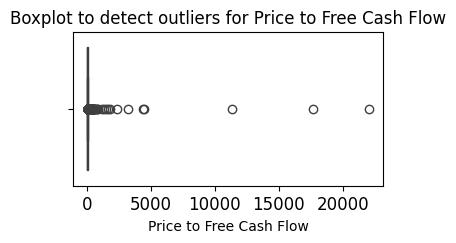

In [ ]:
lower_limit, upper_limit, price_to_cash_flow_outliers = find_outliers(price_df, 'Price to Free Cash Flow')
visualize_outliers(price_df, 'Price to Free Cash Flow')

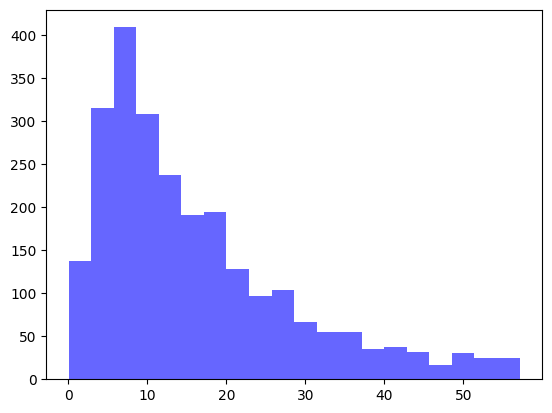

In [ ]:
visualize_distribution(price_df, price_to_cash_flow_outliers, 'Price to Free Cash Flow', 20)

In [ ]:
price_to_cash_flow_outliers[['Company', 'Sector', 'Market Cap', 'Price to Free Cash Flow']].sort_values(by=['Price to Free Cash Flow'], ascending=False).head()

,Company,Sector,Market Cap,Price to Free Cash Flow
6302,On Holding AG,Consumer Cyclical,9050000000.00,22067.36
643,Audiocodes,Technology,356000000.00,17723.48
7777,Snap Inc,Communication Services,25850000000.00,11318.18
1779,Compass Diversified Holdings,Industrials,1510000000.00,4468.68
433,Artivion Inc,Healthcare,737670000.00,4349.15


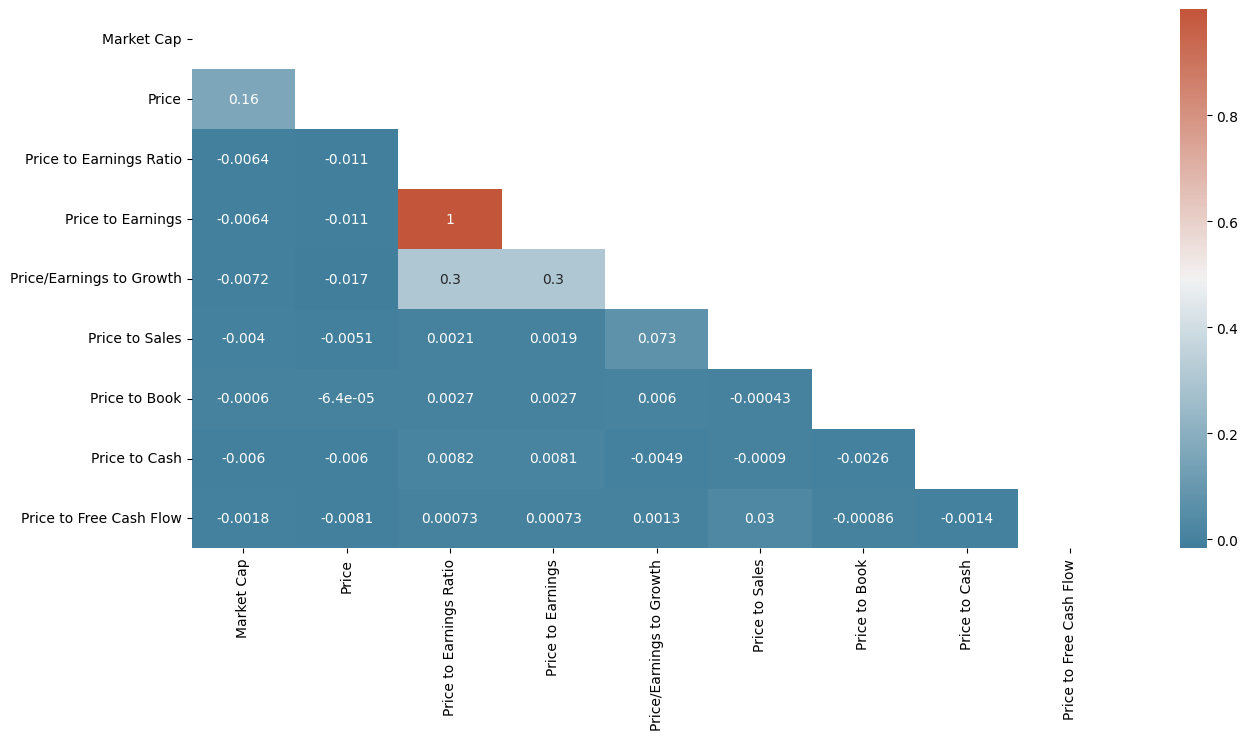

In [ ]:
create_correlation_matrix(price_df, fig_size=(15,7))

So, 'Price to Earnings Ratio' and 'Price to Earnings' I can obviously exclude because formula is all about Earning per Share.

'Price/Earnings to Growth', 'Price to Free Cash Flow' columns have more than 3 000 missing values as previous two, and if i drop rows, I will lose more than 150 000 data, so I will drop just this two columns too.

In [ ]:
df4 = df3.drop(columns=['Price to Earnings Ratio', 'Price to Earnings', 'Price/Earnings to Growth', 'Price to Free Cash Flow'])

In [ ]:
df4.shape

(6108, 52)

##### Earnings

In [ ]:
df4[['Earnings Per Share This Year (%)', 'Earnings Per Share Past 5 Years (%)']].isna().sum()

Earnings Per Share This Year (%)       1752
Earnings Per Share Past 5 Years (%)    2496
dtype: int64

The formula for **Earning per Share** is:

\begin{equation*}
Earning.per.Share =
\frac{Net.Income - Preferred.Dividends}{Common.Shares.Outstanding}
\end{equation*}

\begin{equation*}
Net.Income = Revenue – CODS – Expenses
\end{equation*}

CODS - Cost of Goods Sold



In [ ]:
print('Earnings Per Share This Year (%) max:', df4['Earnings Per Share This Year (%)'].max(), '\nEarnings Per Share This Year (%) min:', df4['Earnings Per Share This Year (%)'].min())

Earnings Per Share This Year (%) max: 79641.23 
Earnings Per Share This Year (%) min: -9931.99


Too many rows are missing, so I can only drop '*Earnings Per Share*' columns.

In [ ]:
df4.drop(columns=['Earnings Per Share This Year (%)', 'Earnings Per Share Past 5 Years (%)'], inplace=True)

##### Dividend

Companies are not required to pay dividends. Then, if the percentage of dividends is missing, then we can assume that the company does not pay dividends.

In [ ]:
df4['Dividend (%)'].fillna(0, inplace=True)

##### Ownerships and Insiders

In [ ]:
df_na_trans = df4[df4['Insider Transactions (%)'].isna()]
df_na_trans[['Insider Ownership (%)', 'Insider Transactions (%)', 'Institutional Ownership (%)']].isna().sum()

Insider Ownership (%)           458
Insider Transactions (%)       3044
Institutional Ownership (%)     880
dtype: int64

In [ ]:
df4[['Insider Ownership (%)', 'Insider Transactions (%)']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6108 entries, 0 to 9500
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Insider Ownership (%)     5650 non-null   float64
 1   Insider Transactions (%)  3064 non-null   float64
dtypes: float64(2)
memory usage: 272.2 KB


In [ ]:
print('Ownership max:', df4['Insider Ownership (%)'].max(), '\nOwnership min:', df4['Insider Ownership (%)'].min())
print('Transactions max:', df4['Insider Transactions (%)'].max(), '\nTransactions min:', df4['Insider Transactions (%)'].min())

Ownership max: 98.62 
Ownership min: 0.0
Transactions max: 4.991 
Transactions min: -0.999


The range of the '*Insider Ownership (%)*' column is from 0 to 100, I can make it categorical.

The range of the '*Insider Transactions (%)*' column is from -1 to 5, I can make it categorical too.

But it is more difficult to make '*Institutional Ownership (%)*' categorical because its range is from -100 to 500, so for modeling it would be more correct to remove this column due to too much missing data.

In [ ]:
def insider_owner_categ(data):
  if data['Insider Ownership (%)'] == 0:
    value = 'zero'
  elif 0 < data['Insider Ownership (%)'] <= 25:
    value = '0_25'
  elif 25 < data['Insider Ownership (%)'] <= 50:
    value = '25_50'
  elif 50 < data['Insider Ownership (%)'] <= 75:
    value = '50_75'
  elif 75 < data['Insider Ownership (%)'] <=100:
    value = '75_100'
  else:
    value = data['Insider Ownership (%)']

  return value

def insider_trans_categ(data):
  if -1 < data['Insider Transactions (%)'] < 0:
    value = '-1_0'
  elif data['Insider Transactions (%)'] == 0:
    value = 'zero'
  elif 0 < data['Insider Transactions (%)'] <= 1:
    value = '0_1'
  elif 1 < data['Insider Transactions (%)'] <= 2:
    value = '1_2'
  elif 2 < data['Insider Transactions (%)'] <= 3:
    value = '2_3'
  elif 3 < data['Insider Transactions (%)'] <= 4:
    value = '3_4'
  elif 4 < data['Insider Transactions (%)'] <= 5:
    value = '4_5'
  else:
    value = data['Insider Transactions (%)']


  return value

In [ ]:
df4['Insider Ownership Categ'] = df4.apply(insider_owner_categ, axis=1)
df4[['Insider Ownership Categ']].value_counts()

Insider Ownership Categ
0_25                       3624
25_50                      1037
50_75                       625
75_100                      273
zero                         91
dtype: int64

In [ ]:
print("NaN value in 'Insider Ownership Categ'", df4[['Insider Ownership Categ']].isna().sum(), '\n\n')
df4['Insider Ownership Categ'].fillna('no_data', inplace=True)

NaN value in 'Insider Ownership Categ' Insider Ownership Categ    458
dtype: int64 




In [ ]:
df4['Insider Transactions Categ'] = df4.apply(insider_trans_categ, axis=1)
df4[['Insider Transactions Categ']].value_counts()

Insider Transactions Categ
-1_0                          1730
0_1                            774
zero                           521
1_2                             27
2_3                              4
3_4                              4
4_5                              4
dtype: int64

In [ ]:
print("NaN value in 'Insider Transactions Categ'", df4[['Insider Transactions Categ']].isna().sum())
df4['Insider Transactions Categ'].fillna('no_data', inplace=True)

NaN value in 'Insider Transactions Categ' Insider Transactions Categ    3044
dtype: int64


In [ ]:
df5 = df4.drop(columns=['Insider Ownership (%)', 'Insider Transactions (%)', 'Institutional Ownership (%)'])
df5.isna().sum()

Company                               0
Sector                                0
Industry                              0
Country                               0
Market Cap                            0
Price                                 0
Change (%)                            0
Volume                                0
Price to Sales                      994
Price to Book                       639
Price to Cash                      1050
Sales Past 5 Years (%)              575
Dividend (%)                          0
Return on Assets (%)                680
Return on Equity (%)                862
Return on Investment (%)            748
Current Ratio                       972
Quick Ratio                        1462
Long-Term Debt to Equity            899
Debt to Equity                      899
Gross Margin (%)                   1869
Operating Margin (%)                576
Profit Margin (%)                  1311
Outstanding Shares                   76
Float                                82


In [ ]:
df5.shape

(6108, 49)

##### Outstanding shares and Float

In [ ]:
df5[['Outstanding Shares', 'Volume', 'Float', 'Float Short (%)']].isna().sum()

Outstanding Shares    76
Volume                 0
Float                 82
Float Short (%)       98
dtype: int64

There is not much missing data in these columns. Let's figure out how to fill it. For this aim let's create correlation matrix.

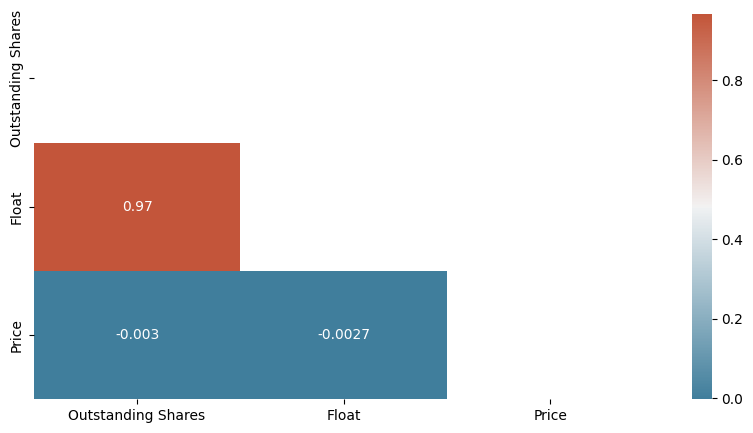

In [ ]:
create_correlation_matrix(df5[['Outstanding Shares', 'Float', 'Price']])

0.97 is a big correlation. I can see the full picture with scatter plot.

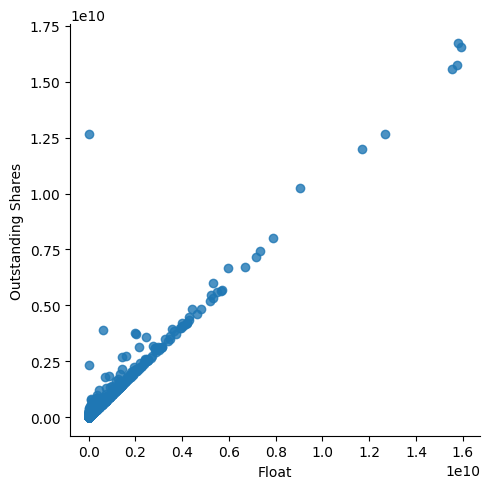

In [ ]:
sns.lmplot(x='Float', y='Outstanding Shares', data=df5, fit_reg=False)

It looks like that simple line can be perfect. So I can use OLS model for predciting missing values in '*Outstanding Shares*' column using '*Float*' column, and vice versa

If company doesn't have information about Float and Outstanding shares, I will exclude them

In [ ]:
nan_df = df5[df5['Outstanding Shares'].isna() & df5['Float'].isna() & df5['Float Short (%)'].isna()]
df5 = df5[~df5.index.isin(nan_df.index)]
df5.shape

(6101, 49)

Let's beginning our modeling.

In [ ]:
df5.rename(columns={'Outstanding Shares': 'Outstanding_Shares'}, inplace=True)

<ipython-input-79-74d9ae0a4063>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.rename(columns={'Outstanding Shares': 'Outstanding_Shares'}, inplace=True)


In [ ]:
# Import ols function
from statsmodels.formula.api import ols

# Subset Data
ols_data = df5[df5['Float'].notna() & df5['Outstanding_Shares'].notna()][["Float", "Outstanding_Shares"]]
# Write out formula
ols_formula_os = "Outstanding_Shares ~ Float"

# Build OLS, fit model to data
OLS_os = ols(formula=ols_formula_os, data=ols_data)
model_os = OLS_os.fit()

<Axes: xlabel='Float', ylabel='Outstanding_Shares'>

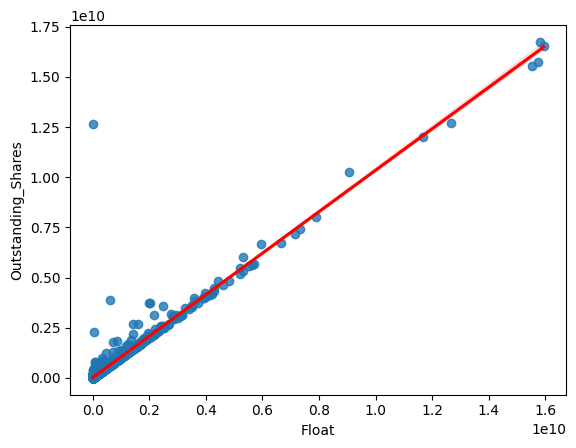

In [ ]:
sns.regplot(x = "Float", y = "Outstanding_Shares", data = ols_data, line_kws={"color": "red"})

Almost perfect line, now let's predict values for Outstanding Shares, where data is missing.

In [ ]:
X_outstanding_shares = df5[df5['Outstanding_Shares'].isna()]["Float"]

# Get predictions from model
fitted_values_for_outstanding_shares = model_os.predict(X_outstanding_shares)
fitted_values_for_outstanding_shares

4       26073943.04
45      47539959.74
145     21373732.46
267     62105447.48
294    387287709.02
           ...     
9167    32034429.87
9417    20826235.40
9438    37323458.05
9476    35608655.94
9488   115336623.62
Length: 69, dtype: float64

In [ ]:
df5['Outstanding_Shares'][fitted_values_for_outstanding_shares.index] = fitted_values_for_outstanding_shares
df5[df5.index.isin(fitted_values_for_outstanding_shares.index)][['Float', 'Outstanding_Shares']]

,Float,Outstanding_Shares
4,8840000.00,26073943.04
45,29620000.00,47539959.74
145,4290000.00,21373732.46
267,43720000.00,62105447.48
294,358510000.00,387287709.02
...,...,...
9167,14610000.00,32034429.87
9417,3760000.00,20826235.40
9438,19730000.00,37323458.05
9476,18070000.00,35608655.94


I will do the same with misssing values in '*Float*' column.

In [ ]:
# Write out formula
ols_formula_f = "Float ~ Outstanding_Shares"

# Build OLS, fit model to data
OLS_f = ols(formula=ols_formula_f, data = ols_data)
model_f = OLS_f.fit()
X_float = df5[df5['Float'].isna()]["Outstanding_Shares"]

# Get predictions from model
fitted_values_for_float = model_f.predict(X_float)
fitted_values_for_float

48      15977161.80
221      2882257.67
258     60844343.66
282      5371371.67
555    239212810.56
           ...     
9023    57164783.82
9163    -3232305.01
9401    18276886.70
9406   114243053.97
9437    76392287.68
Length: 75, dtype: float64

In [ ]:
df5['Float'][fitted_values_for_float.index] = fitted_values_for_float
df5[df5.index.isin(fitted_values_for_float.index)][['Float', 'Outstanding_Shares']]

,Float,Outstanding_Shares
48,15977161.80,22300000.00
221,2882257.67,7780000.00
258,60844343.66,72050000.00
282,5371371.67,10540000.00
555,239212810.56,269830000.00
...,...,...
9023,57164783.82,67970000.00
9163,-3232305.01,1000000.00
9401,18276886.70,24850000.00
9406,114243053.97,131260000.00


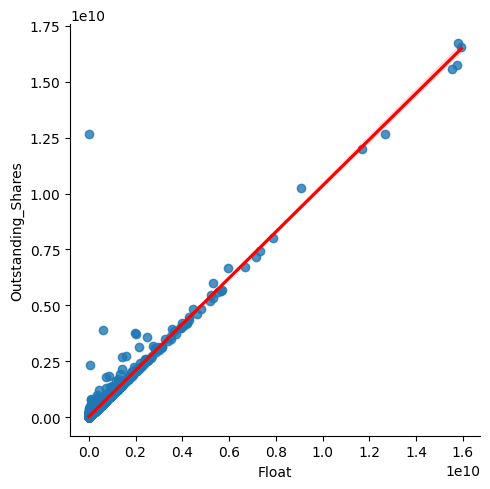

In [ ]:
sns.lmplot(x='Float', y='Outstanding_Shares', data=ols_data, line_kws={"color": "red"})

In [ ]:
df5.isna().sum()

Company                               0
Sector                                0
Industry                              0
Country                               0
Market Cap                            0
Price                                 0
Change (%)                            0
Volume                                0
Price to Sales                      989
Price to Book                       636
Price to Cash                      1046
Sales Past 5 Years (%)              570
Dividend (%)                          0
Return on Assets (%)                675
Return on Equity (%)                857
Return on Investment (%)            743
Current Ratio                       969
Quick Ratio                        1459
Long-Term Debt to Equity            896
Debt to Equity                      896
Gross Margin (%)                   1863
Operating Margin (%)                572
Profit Margin (%)                  1306
Outstanding_Shares                    0
Float                                 0


##### Float Short (%)

In [ ]:
df5[df5['Float Short (%)'].isna()].shape

(91, 49)

There is not much missing data in these columns. Let's check correlation with other column again.

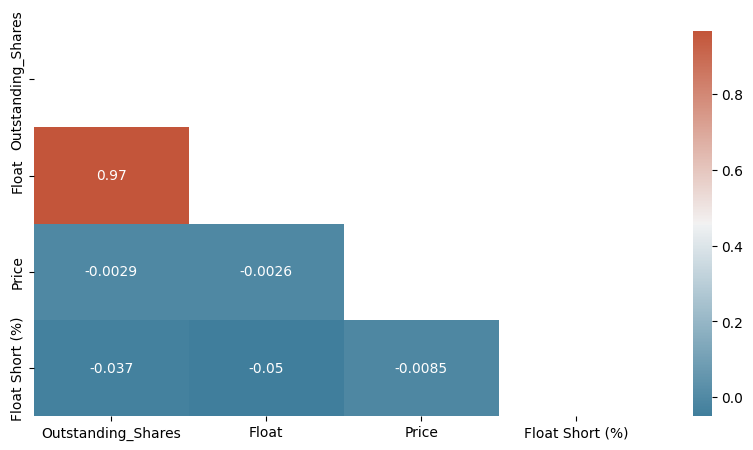

In [ ]:
create_correlation_matrix(df5[['Outstanding_Shares', 'Float', 'Price', 'Float Short (%)']])

Number of rows in the data containing outliers in `Float Short (%)`: 524


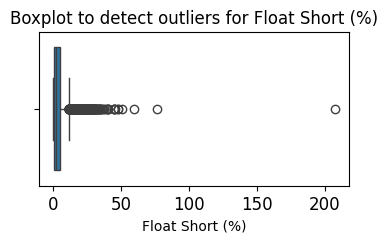

In [ ]:
lower_limit, upper_limit, float_short_outliers = find_outliers(df5, 'Float Short (%)')
visualize_outliers(df5, 'Float Short (%)')

In [ ]:
print('max=', df5['Float Short (%)'].max(), '\nmin=', df5['Float Short (%)'].min())

max= 207.59 
min= 0.0


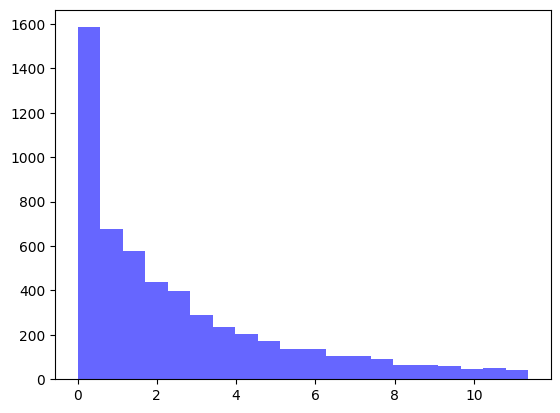

In [ ]:
visualize_distribution(df5, float_short_outliers, 'Float Short (%)', 20)

Most frequent values are between 0 and 0.5. So for 98 rows I can assign mean value

In [ ]:
float_short_series = df5[df5['Float Short (%)'] < 0.5]['Float Short (%)'].value_counts()

count = 0
sum = 0

for i, value in float_short_series.items():
  count += value
  sum += i* value

avg_float_short_less_0_5 = round(sum/count, 2)
avg_float_short_less_0_5

0.16

In [ ]:
df5['Float Short (%)'].fillna(avg_float_short_less_0_5, inplace=True)

In [ ]:
df5.isna().sum()

Company                               0
Sector                                0
Industry                              0
Country                               0
Market Cap                            0
Price                                 0
Change (%)                            0
Volume                                0
Price to Sales                      989
Price to Book                       636
Price to Cash                      1046
Sales Past 5 Years (%)              570
Dividend (%)                          0
Return on Assets (%)                675
Return on Equity (%)                857
Return on Investment (%)            743
Current Ratio                       969
Quick Ratio                        1459
Long-Term Debt to Equity            896
Debt to Equity                      896
Gross Margin (%)                   1863
Operating Margin (%)                572
Profit Margin (%)                  1306
Outstanding_Shares                    0
Float                                 0


##### 'Performance' columns, Volatility and Beta

Number of rows in the data containing outliers in `Performance (Month) (%)`: 641


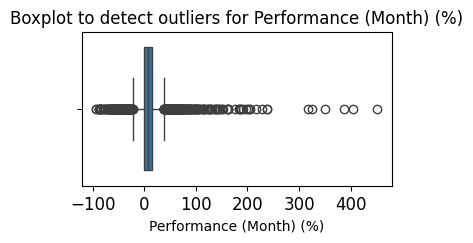

In [ ]:
lower_limit, upper_limit, performance_month_outliers = find_outliers(df5, 'Performance (Month) (%)')
visualize_outliers(df5, 'Performance (Month) (%)')

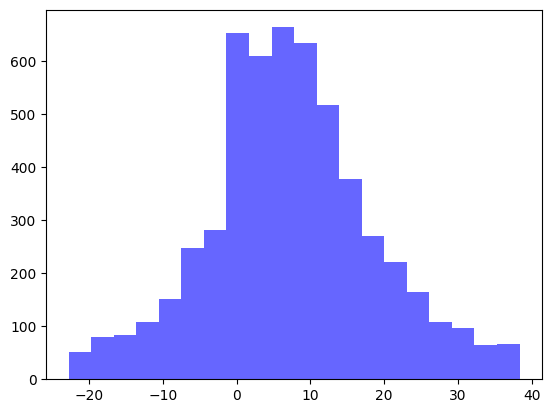

In [ ]:
visualize_distribution(df5, performance_month_outliers, 'Performance (Month) (%)', 20)

In [ ]:
df5['Performance (Month) (%)'].mean()

8.894689451199474

Number of rows in the data containing outliers in `Performance (Quarter) (%)`: 496


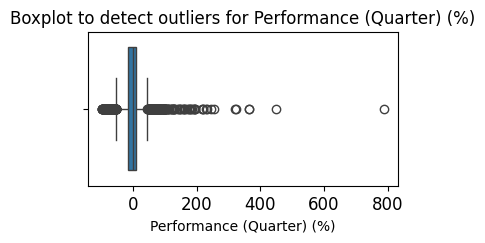

In [ ]:
lower_limit, upper_limit, performance_quarter_outliers = find_outliers(df5, 'Performance (Quarter) (%)')
visualize_outliers(df5, 'Performance (Quarter) (%)')

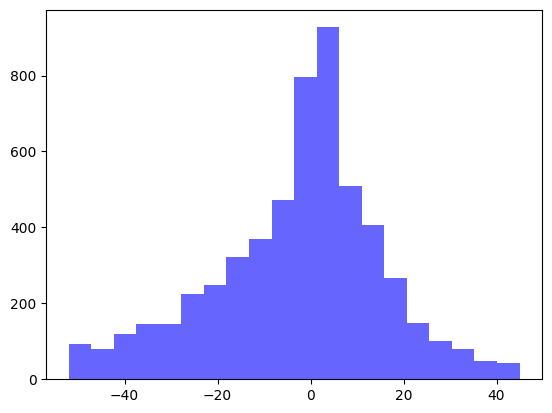

In [ ]:
visualize_distribution(df5, performance_quarter_outliers, 'Performance (Quarter) (%)', 20)

In [ ]:
df5['Performance (Quarter) (%)'].mean()

-2.596908940397351

Number of rows in the data containing outliers in `Performance (Half Year) (%)`: 352


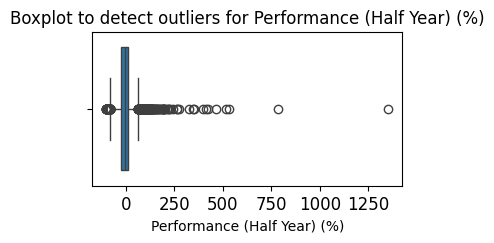

In [ ]:
lower_limit, upper_limit, performance_half_year_outliers = find_outliers(df5, 'Performance (Half Year) (%)')
visualize_outliers(df5, 'Performance (Half Year) (%)')

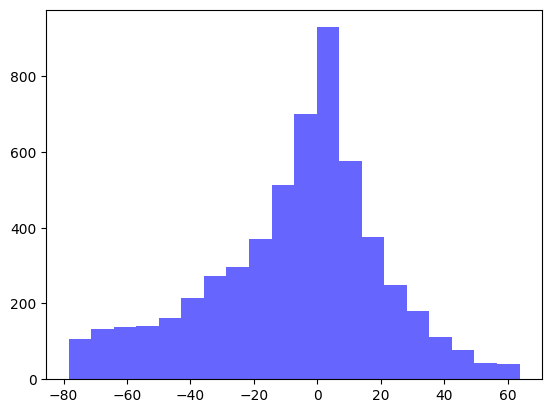

In [ ]:
visualize_distribution(df5, performance_half_year_outliers, 'Performance (Half Year) (%)', 20)

In [ ]:
df5['Performance (Half Year) (%)'].mean()

-5.817355841551061

Number of rows in the data containing outliers in `Performance (Year) (%)`: 280


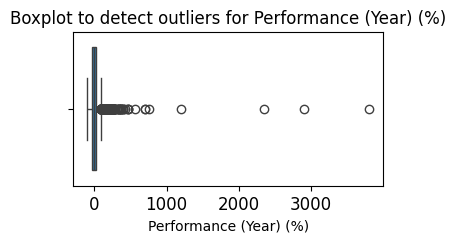

In [ ]:
lower_limit, upper_limit, performance_year_outliers = find_outliers(df5, 'Performance (Year) (%)')
visualize_outliers(df5, 'Performance (Year) (%)')

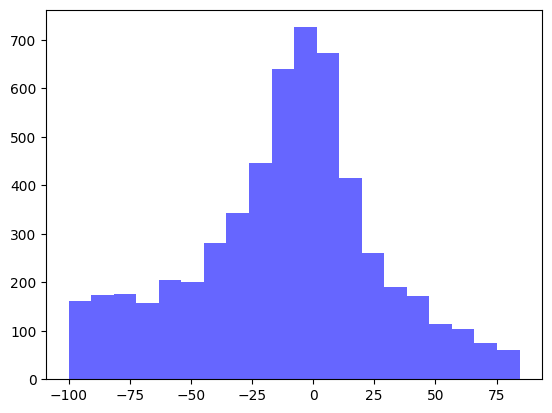

In [ ]:
visualize_distribution(df5, performance_year_outliers, 'Performance (Year) (%)', 20)

In [ ]:
df5['Performance (Year) (%)'].mean()

-1.5094259354177348

Number of rows in the data containing outliers in `Performance (Year) (%)`: 280


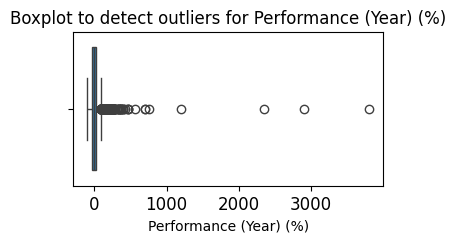

In [ ]:
lower_limit, upper_limit, performance_year_outliers = find_outliers(df5, 'Performance (Year) (%)')
visualize_outliers(df5, 'Performance (Year) (%)')

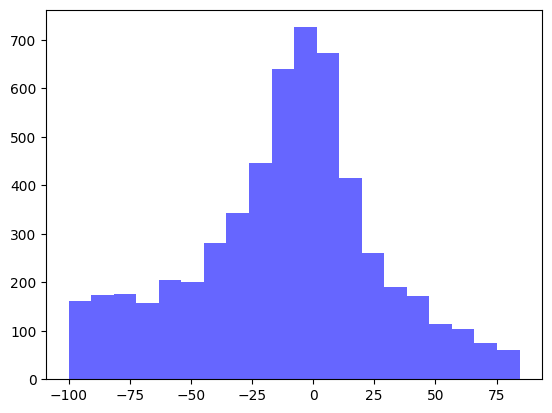

In [ ]:
visualize_distribution(df5, performance_year_outliers, 'Performance (Year) (%)', 20)

In [ ]:
df5['Volatility (Month) (%)'].mean()

5.236797568189287

Short Ratio

Performance (Month) (%)

Performance (Quarter) (%)

Performance (Half Year) (%)

Performance (Year) (%)

Volatility (Month) (%)

Beta







In [ ]:
df5['Short Ratio'].fillna(df5['Short Ratio'].mean(), inplace=True)
df5['Performance (Month) (%)'].fillna(df5['Performance (Month) (%)'].mean(), inplace=True)
df5['Performance (Quarter) (%)'].fillna(df5['Performance (Quarter) (%)'].mean(), inplace=True)
df5['Performance (Half Year) (%)'].fillna(df5['Performance (Half Year) (%)'].mean(), inplace=True)
df5['Performance (Year) (%)'].fillna(df5['Performance (Year) (%)'].mean(), inplace=True)
df5['Volatility (Month) (%)'].fillna(df5['Volatility (Month) (%)'].mean(), inplace=True)
df5['Beta'].fillna(df5['Beta'].mean(), inplace=True)

##### Current Ratio and Quick Ratio

The **current ratio** measures a company's ability to pay current, or short-term, liabilities (debts and payables) with its current, or short-term, assets, such as cash, inventory, and receivables.

The formula for **Current Ratio** is:
\begin{equation*}
Current.Ratio =
\frac{Current.Assets}{Current.Liabilities}
\end{equation*}

It's an important column so it will be correct to exclude rows without this data, not entire column.

In [ ]:
rat_na = df5[df5['Current Ratio'].isna()]
rat_na.isna().sum()

Company                              0
Sector                               0
Industry                             0
Country                              0
Market Cap                           0
Price                                0
Change (%)                           0
Volume                               0
Price to Sales                     185
Price to Book                      202
Price to Cash                      511
Sales Past 5 Years (%)             473
Dividend (%)                         0
Return on Assets (%)               496
Return on Equity (%)               509
Return on Investment (%)           495
Current Ratio                      969
Quick Ratio                        969
Long-Term Debt to Equity           504
Debt to Equity                     504
Gross Margin (%)                   542
Operating Margin (%)               477
Profit Margin (%)                  498
Outstanding_Shares                   0
Float                                0
Float Short (%)          

In [ ]:
df6 = df5[~df5.index.isin(rat_na.index)]
df6.isna().sum()

Company                               0
Sector                                0
Industry                              0
Country                               0
Market Cap                            0
Price                                 0
Change (%)                            0
Volume                                0
Price to Sales                      804
Price to Book                       434
Price to Cash                       535
Sales Past 5 Years (%)               97
Dividend (%)                          0
Return on Assets (%)                179
Return on Equity (%)                348
Return on Investment (%)            248
Current Ratio                         0
Quick Ratio                         490
Long-Term Debt to Equity            392
Debt to Equity                      392
Gross Margin (%)                   1321
Operating Margin (%)                 95
Profit Margin (%)                   808
Outstanding_Shares                    0
Float                                 0


In [ ]:
df6.shape

(5132, 49)

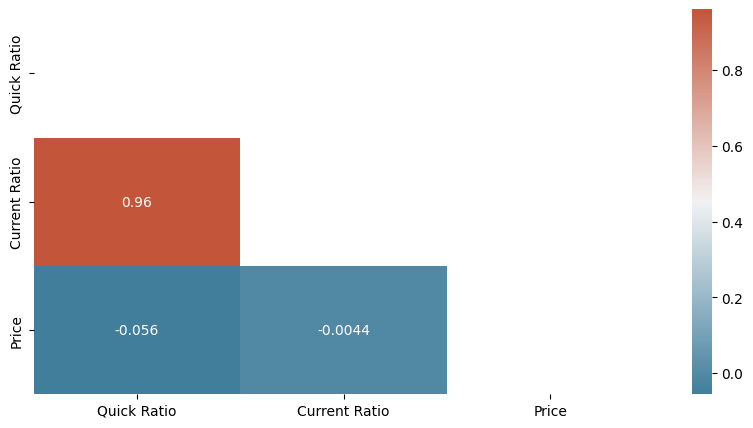

In [ ]:
create_correlation_matrix(df6[['Quick Ratio', 'Current Ratio', 'Price']])

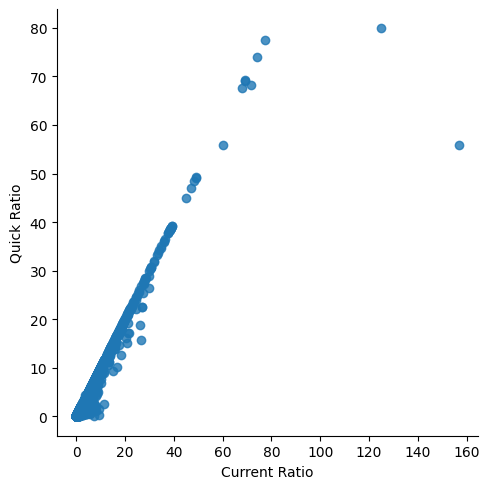

In [ ]:
sns.lmplot(x='Current Ratio', y='Quick Ratio', data=df6, fit_reg=False)

Correlation is big as in situation with Float, but amount of missing values is too big - 490, because influence on the future model will be too great. So I can't fill using OLS model. But because of correlation I can drop '*Quick Ratio*' column.

Current liabilities are typically settled using current assets, which are assets that are used up within one year. Current assets include cash or accounts receivable, which is money owed by customers for sales.


In [ ]:
df6.drop(columns=['Quick Ratio'], inplace=True)

<ipython-input-119-8a7ed86707cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop(columns=['Quick Ratio'], inplace=True)


### Margins

The formula for **Gross margin** is:


\begin{equation*}
GrossMargin = NetSales - COGS
\end{equation*}

\begin{equation*}
GrossMarginPercentage =
\frac{TotalRevenue - COGS}{Total Revenue}*100
\end{equation*}

Net Sales=Equivalent to Revenue, or the total amount of money generated from sales for the period. It can also be called net sales because it can include discounts and deductions from returned merchandise.


Revenue is typically called the top line because it sits on top of the income statement. Costs are subtracted from revenue to calculate net income or the bottom line. COGS=Cost of goods sold. The direct costs associated with producing goods. Includes both direct labor costs, and any costs of materials used in producing or manufacturing a company’s products.




The formula for **Operating Margin** is:

\begin{equation*}
OperatingMargin =
\frac{OperatingEarnings}{Revenue} = \frac{Revenue - COGS}{Revenue}
\end{equation*}

When calculating operating margin, the numerator uses a firm's earnings before interest and taxes (EBIT). EBIT, or operating earnings, is calculated simply as *Revenue* minus *cost of goods sold (COGS)* and the regular selling, general, and administrative costs of running a business, excluding interest and taxes.

The formula for **Profit Margin** is:

\begin{equation*}
ProfitMargin =
\frac{R−COGS−OPE−OTE−I−T}{R}*100
\end{equation*}

R - Revenue

COGS - Cost of goods sold

OPE - Operating expenses

OTE - Other expenses

I - Interest

T - Taxes​

Creating correlation matrix for Margins

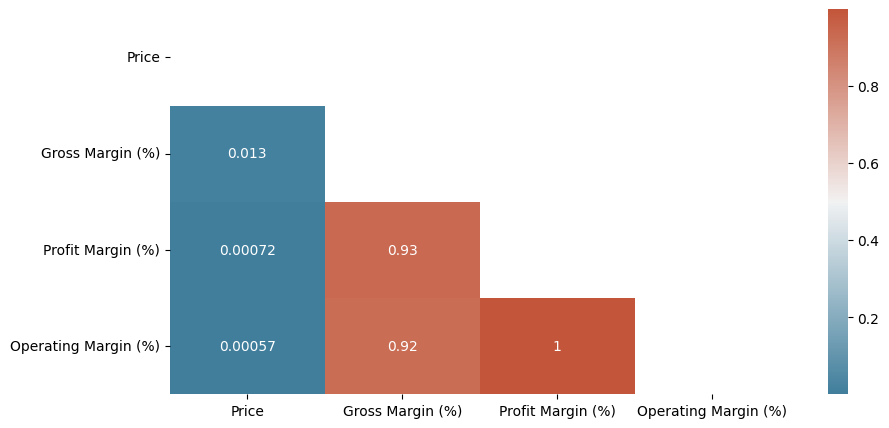

In [ ]:
create_correlation_matrix(df6[['Price', 'Gross Margin (%)', 'Profit Margin (%)', 'Operating Margin (%)']])

After looking at formula and correlation matrix I think I can drop 'Gross Margin (%)' (because in fact Gross Margin = Operating Margin * 100%) and 'Profit Margin (%)' (because of correlation with k=1) columns.

In [ ]:
df6[['Operating Margin (%)', 'Profit Margin (%)']].head(100)

,Operating Margin (%),Profit Margin (%)
0,23.85,18.15
1,-0.65,-8.09
4,-21.46,-18.84
5,0.00,NaN
6,NaN,NaN
...,...,...
128,17.61,0.63
129,0.87,3.83
130,-12.87,-7.93
131,-3438.09,-3966.15


Number of rows in the data containing outliers in `Operating Margin (%)`: 987


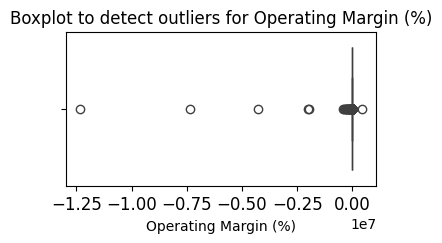

In [ ]:
lower_limit, upper_limit, operating_margin_outliers = find_outliers(df5, 'Operating Margin (%)')
visualize_outliers(df6, 'Operating Margin (%)')

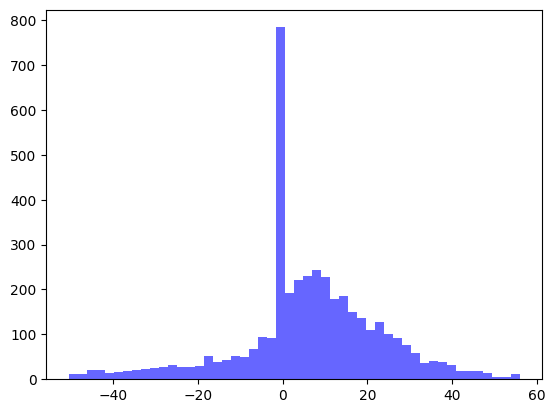

In [ ]:
visualize_distribution(df6, operating_margin_outliers, 'Operating Margin (%)', 50)

In [ ]:
df6[df6['Operating Margin (%)'] == 0.0][['Operating Margin (%)']].shape[0]

692

0.0 is the most frequent value, so I will fill na with 0.0 value. Except this value distribution almost normal.

In [ ]:
df6['Operating Margin (%)'].fillna(0.0, inplace=True)
df6['Price to Sales'].fillna(df6['Price to Sales'].min(), inplace=True)
df6['Price to Cash'].fillna(df6['Price to Sales'].min(), inplace=True)

<ipython-input-126-01760b8f15bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Operating Margin (%)'].fillna(0.0, inplace=True)
<ipython-input-126-01760b8f15bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Price to Sales'].fillna(df6['Price to Sales'].min(), inplace=True)
<ipython-input-126-01760b8f15bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Price to Cash'].fillna(df6['Price to Sales'].min(), inplace=Tr

In [ ]:
df6.shape

(5132, 48)

In [ ]:
df7 = df6.drop(columns=['Gross Margin (%)', 'Profit Margin (%)'])
df7.isna().sum()

Company                              0
Sector                               0
Industry                             0
Country                              0
Market Cap                           0
Price                                0
Change (%)                           0
Volume                               0
Price to Sales                       0
Price to Book                      434
Price to Cash                        0
Sales Past 5 Years (%)              97
Dividend (%)                         0
Return on Assets (%)               179
Return on Equity (%)               348
Return on Investment (%)           248
Current Ratio                        0
Long-Term Debt to Equity           392
Debt to Equity                     392
Operating Margin (%)                 0
Outstanding_Shares                   0
Float                                0
Float Short (%)                      0
Short Ratio                          0
Average Volume                       0
Performance (Week) (%)   

In [ ]:
df7.shape

(5132, 46)

#### 'Returns' columns

\begin{equation*}
Return.on.Assets =
\frac{Net.Income}{Total.Assets}
\end{equation*}

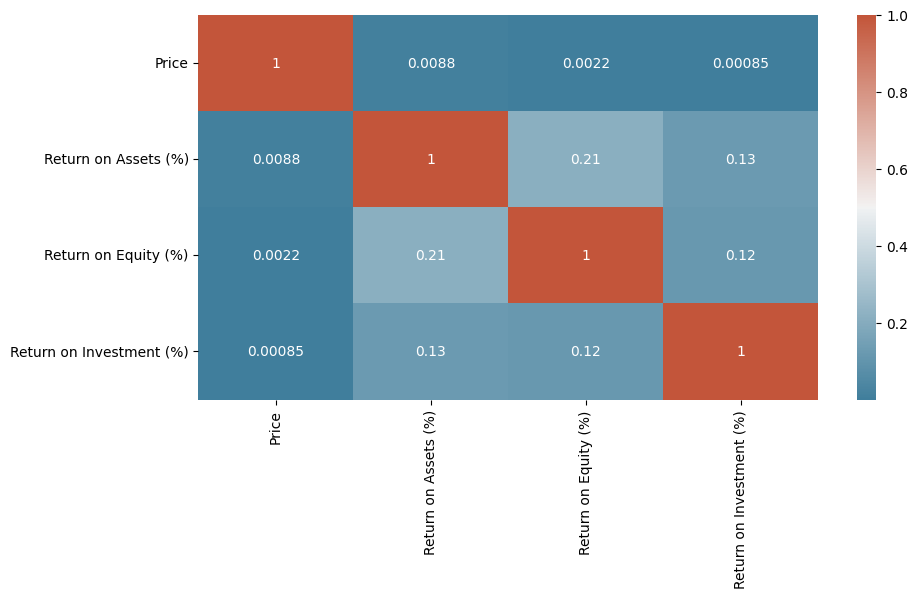

In [ ]:
create_correlation_matrix(df7[['Price', 'Return on Assets (%)', 'Return on Equity (%)', 'Return on Investment (%)']], masked=False)

In [ ]:
print('Return on Assets (%) =', df7['Return on Assets (%)'].min())
print('Return on Equity (%) =', df7['Return on Equity (%)'].min())
print('Return on Investment (%) =', df7['Return on Investment (%)'].min())

Return on Assets (%) = -1939.09
Return on Equity (%) = -42790.17
Return on Investment (%) = -152683.33


'Return on Assets (%)' is an important column for future analyzing, so I drop NaN values

In [ ]:
df7[df7['Return on Assets (%)'].isna()].isna().sum()

Company                              0
Sector                               0
Industry                             0
Country                              0
Market Cap                           0
Price                                0
Change (%)                           0
Volume                               0
Price to Sales                       0
Price to Book                       35
Price to Cash                        0
Sales Past 5 Years (%)              46
Dividend (%)                         0
Return on Assets (%)               179
Return on Equity (%)               179
Return on Investment (%)           112
Current Ratio                        0
Long-Term Debt to Equity            24
Debt to Equity                      24
Operating Margin (%)                 0
Outstanding_Shares                   0
Float                                0
Float Short (%)                      0
Short Ratio                          0
Average Volume                       0
Performance (Week) (%)   

In [ ]:
df8 = df7.dropna(subset='Return on Assets (%)')

In [ ]:
df8[['Return on Assets (%)', 'Return on Equity (%)', 'Return on Investment (%)']].isna().sum()

Return on Assets (%)          0
Return on Equity (%)        169
Return on Investment (%)    136
dtype: int64

**Return on Equity**

Number of rows in the data containing outliers in `Return on Equity (%)`: 541


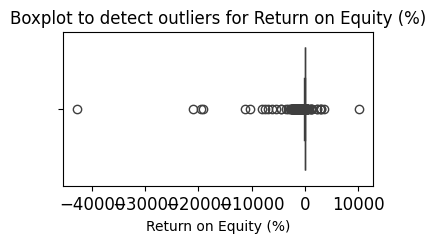

In [ ]:
lower_limit, upper_limit, return_on_equity_outliers = find_outliers(df8, 'Return on Equity (%)')
visualize_outliers(df8, 'Return on Equity (%)')

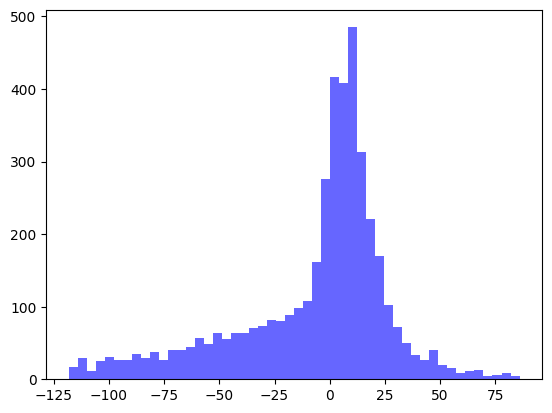

In [ ]:
visualize_distribution(df8, return_on_equity_outliers, 'Return on Equity (%)', 50)

Number of rows in the data containing outliers in `Return on Investment (%)`: 577


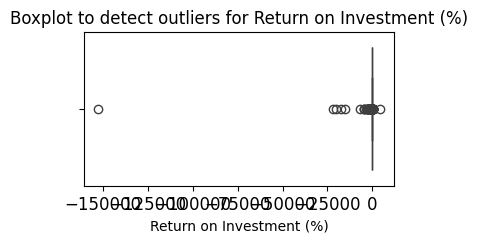

In [ ]:
lower_limit, upper_limit, return_on_investment_outliers = find_outliers(df8, 'Return on Investment (%)')
visualize_outliers(df8, 'Return on Investment (%)')

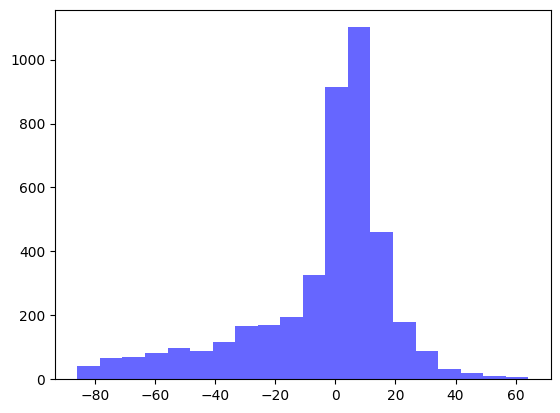

In [ ]:
visualize_distribution(df8, return_on_investment_outliers, 'Return on Investment (%)', 20)

Most frequent value are not 0.0 in both histplots, but it's not correct to assign any value except 0. This columns can't be dropped because of importance of them, and rows can't be dropped because there are more than 150.




In [ ]:
df8['Return on Investment (%)'].fillna(0.0, inplace=True)
df8['Return on Equity (%)'].fillna(0.0, inplace=True)

<ipython-input-139-f0b8cfd910ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['Return on Investment (%)'].fillna(0.0, inplace=True)
<ipython-input-139-f0b8cfd910ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['Return on Equity (%)'].fillna(0.0, inplace=True)


##### Debt to Equity and Sales

In [ ]:
df8.isna().sum()

Company                              0
Sector                               0
Industry                             0
Country                              0
Market Cap                           0
Price                                0
Change (%)                           0
Volume                               0
Price to Sales                       0
Price to Book                      399
Price to Cash                        0
Sales Past 5 Years (%)              51
Dividend (%)                         0
Return on Assets (%)                 0
Return on Equity (%)                 0
Return on Investment (%)             0
Current Ratio                        0
Long-Term Debt to Equity           368
Debt to Equity                     368
Operating Margin (%)                 0
Outstanding_Shares                   0
Float                                0
Float Short (%)                      0
Short Ratio                          0
Average Volume                       0
Performance (Week) (%)   

In [ ]:
df9 = df8[~df8['Debt to Equity'].isna()]
df9 = df9.dropna(subset='Debt to Equity')
df9.isna().sum()

Company                             0
Sector                              0
Industry                            0
Country                             0
Market Cap                          0
Price                               0
Change (%)                          0
Volume                              0
Price to Sales                      0
Price to Book                      31
Price to Cash                       0
Sales Past 5 Years (%)             45
Dividend (%)                        0
Return on Assets (%)                0
Return on Equity (%)                0
Return on Investment (%)            0
Current Ratio                       0
Long-Term Debt to Equity            0
Debt to Equity                      0
Operating Margin (%)                0
Outstanding_Shares                  0
Float                               0
Float Short (%)                     0
Short Ratio                         0
Average Volume                      0
Performance (Week) (%)              0
Performance 

Number of rows in the data containing outliers in `Sales Past 5 Years (%)`: 550


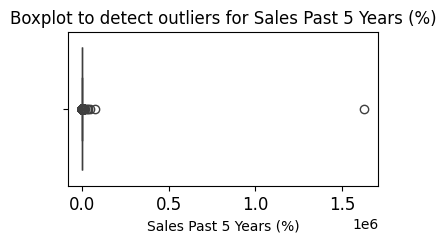

In [ ]:
lower_limit, upper_limit, sales_past_5_outliers = find_outliers(df9, 'Sales Past 5 Years (%)')
visualize_outliers(df9, 'Sales Past 5 Years (%)')

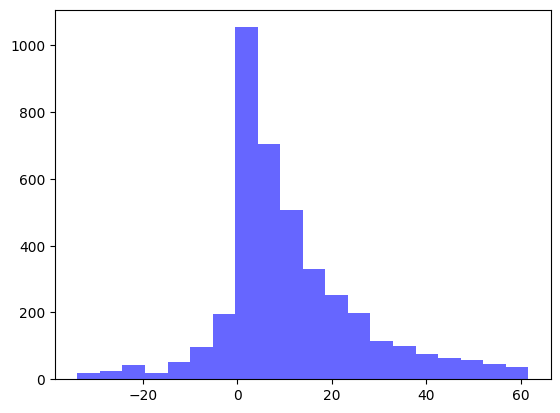

In [ ]:
visualize_distribution(df9, sales_past_5_outliers, 'Sales Past 5 Years (%)', 20)

Only 31 missing value, so let's fill NaN values with most frequent value again.

In [ ]:
avg_most_frequent_sales = df9[(df9['Sales Past 5 Years (%)'] < 5) & (df9['Sales Past 5 Years (%)'] >= 0)]['Sales Past 5 Years (%)'].mean()
df9['Sales Past 5 Years (%)'].fillna(avg_most_frequent_sales, inplace=True)

Number of rows in the data containing outliers in `Price to Book`: 477


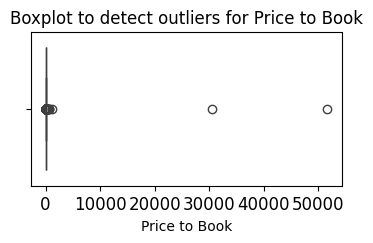

In [ ]:
lower_limit, upper_limit, price_book_outliers = find_outliers(df9, 'Price to Book')
visualize_outliers(df9, 'Price to Book')

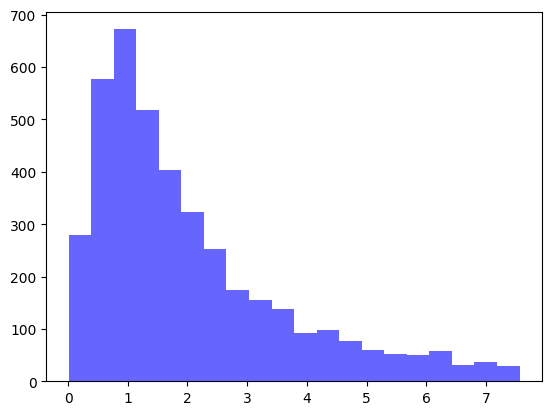

In [ ]:
visualize_distribution(df9, price_book_outliers, 'Price to Book', 20)

Most frequent is not suitable value for Price to Book because range is from 0 to ... So min() value is better.

In [ ]:
df9['Price to Book'].fillna(df9['Price to Book'].min(), inplace=True)

In [ ]:
df9.isna().sum()

Company                            0
Sector                             0
Industry                           0
Country                            0
Market Cap                         0
Price                              0
Change (%)                         0
Volume                             0
Price to Sales                     0
Price to Book                      0
Price to Cash                      0
Sales Past 5 Years (%)             0
Dividend (%)                       0
Return on Assets (%)               0
Return on Equity (%)               0
Return on Investment (%)           0
Current Ratio                      0
Long-Term Debt to Equity           0
Debt to Equity                     0
Operating Margin (%)               0
Outstanding_Shares                 0
Float                              0
Float Short (%)                    0
Short Ratio                        0
Average Volume                     0
Performance (Week) (%)             0
Performance (Month) (%)            0
P

In [ ]:
df9.rename(columns={
    'Market Cap':'Market_Cap',
    'Change (%)':'Change_p',
    'Price to Sales':'Price_to_Sales',
    'Price to Book':'Price_to_Book',
    'Price to Cash':'Price_to_Cash',
    'Sales Past 5 Years (%)':'Sales_Past_5_Years_p',
    'Dividend (%)':'Dividend_p',
    'Return on Assets (%)':'Return_on_Assets_p',
    'Return on Equity (%)':'Return_on_Equity_p',
    'Return on Investment (%)':'Return_on_Investment_p',
    'Current Ratio':'Current_Ratio',
    'Long-Term Debt to Equity':'Long_Term_Debt_to_Equity',
    'Debt to Equity':'Debt_to_Equity',
    'Operating Margin (%)':'Operating_Margin_p',
    'Float Short (%)':'Float_Short_p',
    'Short Ratio':'Short_Ratio',
    'Average Volume':'Average_Volume',
    'Relative Volume':'Relative_Volume',
    'Performance (Week) (%)':'Performance_Week_p',
    'Performance (Month) (%)':'Performance_Month_p',
    'Performance (Quarter) (%)':'Performance_Quarter_p',
    'Performance (Half Year) (%)':'Performance_Half_Year_p',
    'Performance (Year) (%)':'Performance_Year_p',
    'Performance (Year to Date) (%)':'Performance_Year_to_Date_p',
    'Volatility (Week) (%)':'Volatility_Week_p',
    'Volatility (Month) (%)':'Volatility_Month_p',
    'Average True Range':'Average_True_Range',
    'Simple Moving Average (20) (%)':'Simple_Moving_Average_20_p',
    'Simple Moving Average (50) (%)':'Simple_Moving_Average_50_p',
    'Simple Moving Average (200) (%)':'Simple_Moving_Average_200_p',
    'Yearly High (%)':'Yearly_High_p',
    'Yearly Low (%)':'Yearly_Low_p',
    'Relative Strength Index':'Relative_Strength_Index',
    'Change from Open (%)':'Change_from_Open_p',
    'Gap (%)':'Gap_p',
    'Insider Ownership Categ': 'Insider_Ownership_Categ',
    'Insider Transactions Categ': 'Insider_Transactions_Categ'
    }, inplace=True)

In [ ]:
df9.head()

,Company,Sector,Industry,Country,Market_Cap,Price,Change_p,Volume,Price_to_Sales,Price_to_Book,Price_to_Cash,Sales_Past_5_Years_p,Dividend_p,Return_on_Assets_p,Return_on_Equity_p,Return_on_Investment_p,Current_Ratio,Long_Term_Debt_to_Equity,Debt_to_Equity,Operating_Margin_p,Outstanding_Shares,Float,Float_Short_p,Short_Ratio,Average_Volume,Performance_Week_p,Performance_Month_p,Performance_Quarter_p,Performance_Half_Year_p,Performance_Year_p,Performance_Year_to_Date_p,Volatility_Week_p,Volatility_Month_p,Relative_Volume,Beta,Average_True_Range,Simple_Moving_Average_20_p,Simple_Moving_Average_50_p,Simple_Moving_Average_200_p,Yearly_High_p,Yearly_Low_p,Relative_Strength_Index,Change_from_Open_p,Gap_p,Insider_Ownership_Categ,Insider_Transactions_Categ
0,Agilent Technologies Inc.,Healthcare,Diagnostics & Research,USA,37840000000.00,129.45,1.81,367712.00,5.53,6.46,23.80,7.00,0.73,11.65,22.24,14.45,2.61,0.47,0.47,23.85,292120000.00,291330000.00,1.97,2.69,2130000.00,0.07,19.70,14.36,8.80,-17.48,-13.82,1.86,1.95,0.89,1.12,2.74,6.04,13.36,4.89,-19.53,33.23,69.70,1.06,0.33,0_25,-1_0
1,Alcoa Corp,Basic Materials,Aluminum,USA,4450000000.00,24.99,-0.40,1171185.00,0.41,0.99,4.18,3.40,1.34,-6.08,-17.71,-13.85,1.66,0.40,0.40,-0.65,176970000.00,176720000.00,6.69,2.14,5520000.00,-7.01,1.42,-11.60,-28.75,-47.27,-45.17,3.90,3.38,0.78,2.43,1.00,-4.23,-4.21,-25.24,-56.73,8.06,42.06,0.73,-1.08,0_25,no_data
4,ATA Creativity Global ADR,Consumer Defensive,Education & Training Services,China,28860000.00,0.88,9.88,4255.00,0.92,1.97,3.13,1378.42,0.00,-8.84,-33.96,-35.81,0.22,0.13,0.29,-21.46,26073943.04,8840000.00,0.05,0.80,4990.00,1.25,6.00,-22.33,-28.49,-40.89,-29.24,10.09,9.22,1.43,1.09,0.09,1.54,-7.80,-35.57,-63.81,12.63,48.99,6.00,4.94,no_data,no_data
5,Armada Acquisition Corp I,Financial,Shell Companies,USA,87400000.00,10.83,0.19,11.00,0.01,5.13,1439.15,0.00,0.00,-0.36,-0.39,-1.90,0.01,0.00,0.15,0.00,8070000.00,2440000.00,0.02,0.04,12080.00,0.65,0.94,3.65,2.18,9.77,6.62,0.21,0.26,0.05,0.00,0.05,0.56,1.01,5.21,-11.56,26.05,57.62,-0.37,0.19,50_75,no_data
7,Aadi Bioscience Inc,Healthcare,Biotechnology,USA,120200000.00,4.86,-2.02,22395.00,5.18,1.02,1.01,213.25,0.00,-38.00,-44.14,-53.22,6.48,0.01,0.06,-299.67,24440000.00,17230000.00,4.32,6.65,111790.00,-4.09,9.33,-17.45,-37.40,-62.92,-61.65,6.92,5.89,1.04,1.07,0.30,1.42,8.15,-23.64,-63.61,26.80,52.51,-2.38,1.61,25_50,-1_0


In [ ]:
df9.to_csv('usa_glob_market.csv')

### **Details after PLAN stage**

1. Many columns of the dataframe were missing a lot of data. The dataframe consisted of 63 columns, and 29 of them had more than 3000 missing data, all of them were cleaned up, some columns were completely removed from the dataframe due to the inability to fill in the data. All missing data was not thrown away because there were 9501 rows in the dataframe, and after cleaning it would be less than 1500 rows, which is a loss of more than 80% of the rows.
2. After descriptive statistics, it became obvious that in almost 80% of the columns there are outliers; later, during modeling, they will need to be correctly processed, either thrown out of the dataframe or replaced.
3. Duplicates of columns were found, namely Volume. One of them was removed from the dataframe after checking for correlation.
4. Some columns, for example, such as Dividend, were filled with zeros, since it is believed that if such data is not received from a company, then it does not pay dividends.
5. The analysis revealed a clear correlation between Float and Outstanding_Shares and used linear regression to fill in the missing data in the Outstanding_Shares column.